**Tarea 4**


1. Descargue los datos de las Carpetas de Investigación (acumulado 2016-2024) en el sitio: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico. Con el parámetro chunksize lea los datos y realice lo siguiente:

Obtenga un Dataframe con la frecuencia de los delitos en orden descendente y un gráfico que ilustre los primeros 15 delitos con más frecuencia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns

In [2]:
ruta = 'https://archivo.datos.cdmx.gob.mx/FGJ/carpetas/carpetasFGJ_acumulado_2025_01.csv'
df = pd.read_csv(ruta, chunksize=100_000)
df

In [4]:
for chunk in pd.read_csv(ruta, chunksize=100_000):
    print(chunk.columns)
    break

Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'hora_inicio',
       'anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho', 'delito',
       'categoria_delito', 'competencia', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_hecho', 'colonia_catalogo',
       'alcaldia_hecho', 'alcaldia_catalogo', 'municipio_hecho', 'latitud',
       'longitud'],
      dtype='object')


In [5]:
tot = pd.Series([], dtype='int64')

for piece in df:
    tot = tot.add(piece['delito'].value_counts(), fill_value=0)
    tot = tot.sort_values(ascending=False)

delitos = pd.DataFrame(tot,columns=['Frecuencia'])
delitos

/tmp/ipython-input-5-4010634999.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for piece in df:
/tmp/ipython-input-5-4010634999.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for piece in df:
/tmp/ipython-input-5-4010634999.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for piece in df:
/tmp/ipython-input-5-4010634999.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for piece in df:
/tmp/ipython-input-5-4010634999.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for piece in df:
/tmp/ipython-input-5-4010634999.py:3: DtypeWarning: Columns (10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  for piece in df:


,Frecuencia
delito,
VIOLENCIA FAMILIAR,261181.0
FRAUDE,156399.0
AMENAZAS,135941.0
ROBO DE OBJETOS,112702.0
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,88535.0
...,...
ASOCIACION DELICTUOSA,1.0
ROBO DE VEHICULO Y NOMINA CON VIOLENCIA,1.0
CONTRA LA LEY FEDERAL DE POBLACION,1.0


In [6]:
delitos = delitos.head(15).sort_values(by=['Frecuencia'])

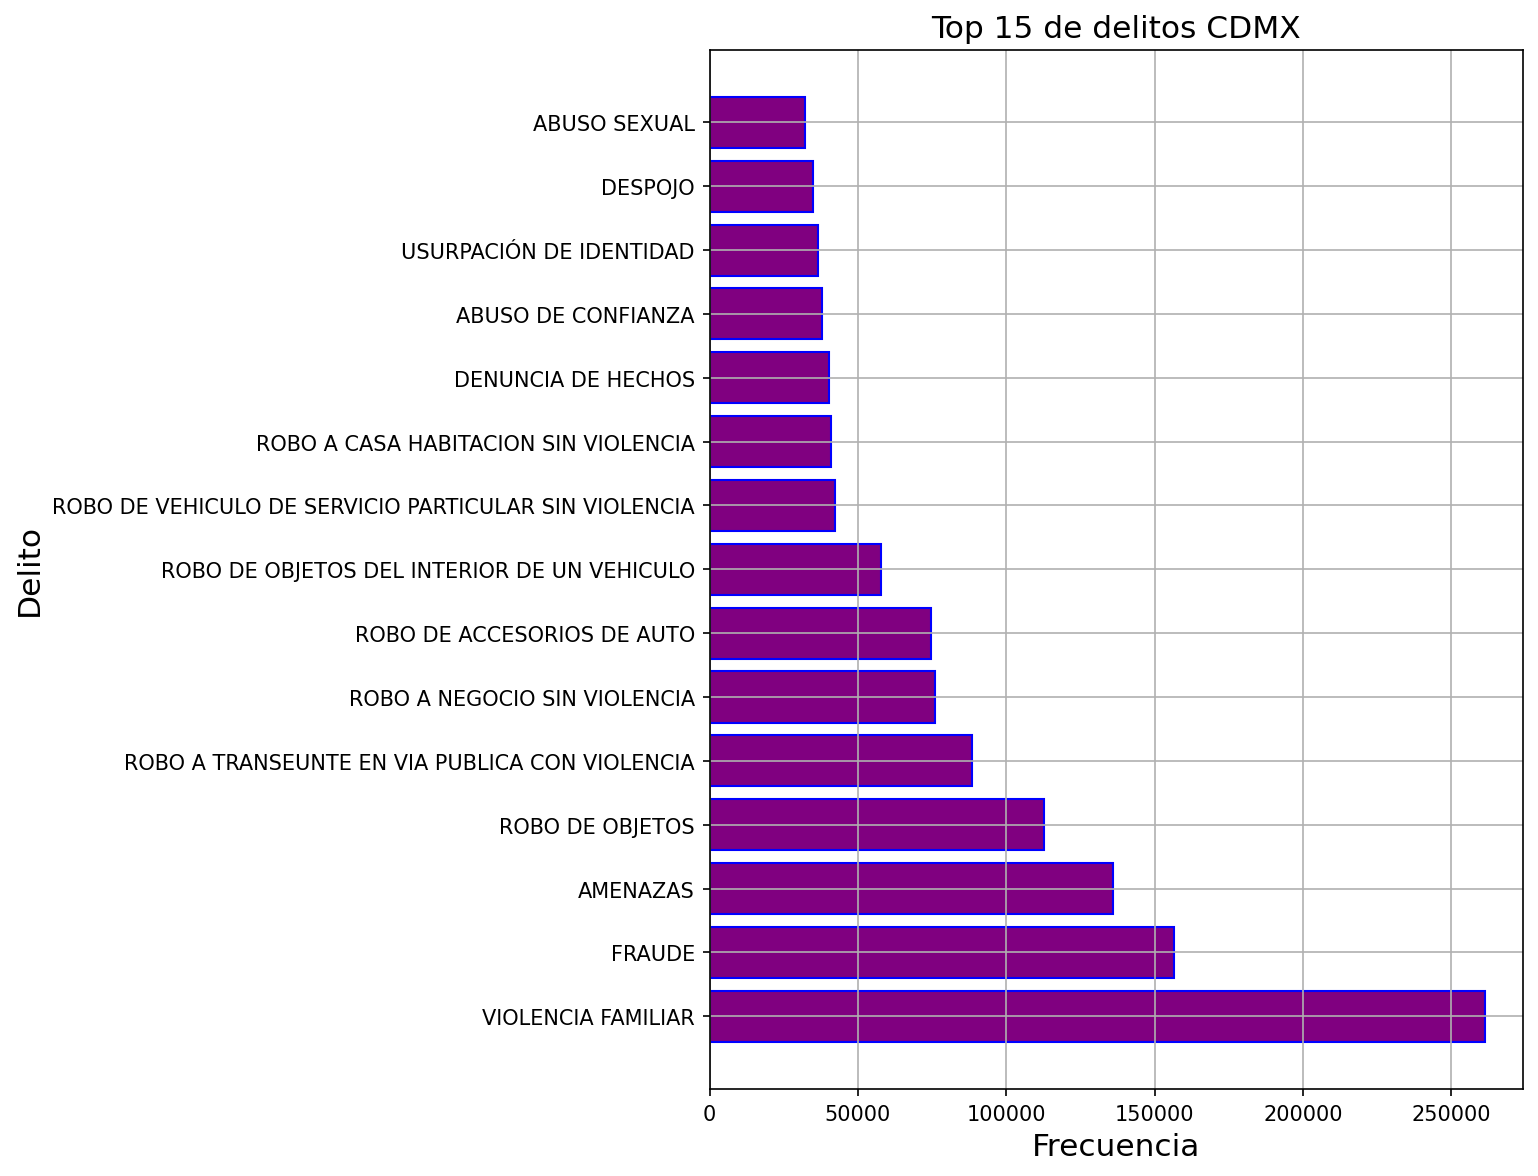

In [9]:
plt.figure(figsize=(7,9), dpi=150)
plt.barh(delitos.index, delitos['Frecuencia']
         ,facecolor='purple', edgecolor='blue')
plt.title('Top 15 de delitos CDMX', fontsize = 15)
plt.xlabel('Frecuencia', fontsize = 15)
plt.ylabel('Delito', fontsize = 15)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

Obtenga un Dataframe con los delitos cometidos por alcaldía y un gráfico que ilustre esto.

In [10]:
#obtener un Data Frame de delitos cometidos por alcaldia
delitos_alcaldia = piece.groupby('alcaldia_hecho').size().reset_index(name='cantidad_delitos')
delitos_alcaldia = delitos_alcaldia.sort_values(by='cantidad_delitos', ascending=False)
delitos_alcaldia

,alcaldia_hecho,cantidad_delitos
6,CUAUHTEMOC,14378
9,IZTAPALAPA,13016
7,GUSTAVO A. MADERO,9054
2,BENITO JUAREZ,7282
4,COYOACAN,6816
14,TLALPAN,6309
0,ALVARO OBREGON,6178
11,MIGUEL HIDALGO,5816
15,VENUSTIANO CARRANZA,5397
8,IZTACALCO,4454


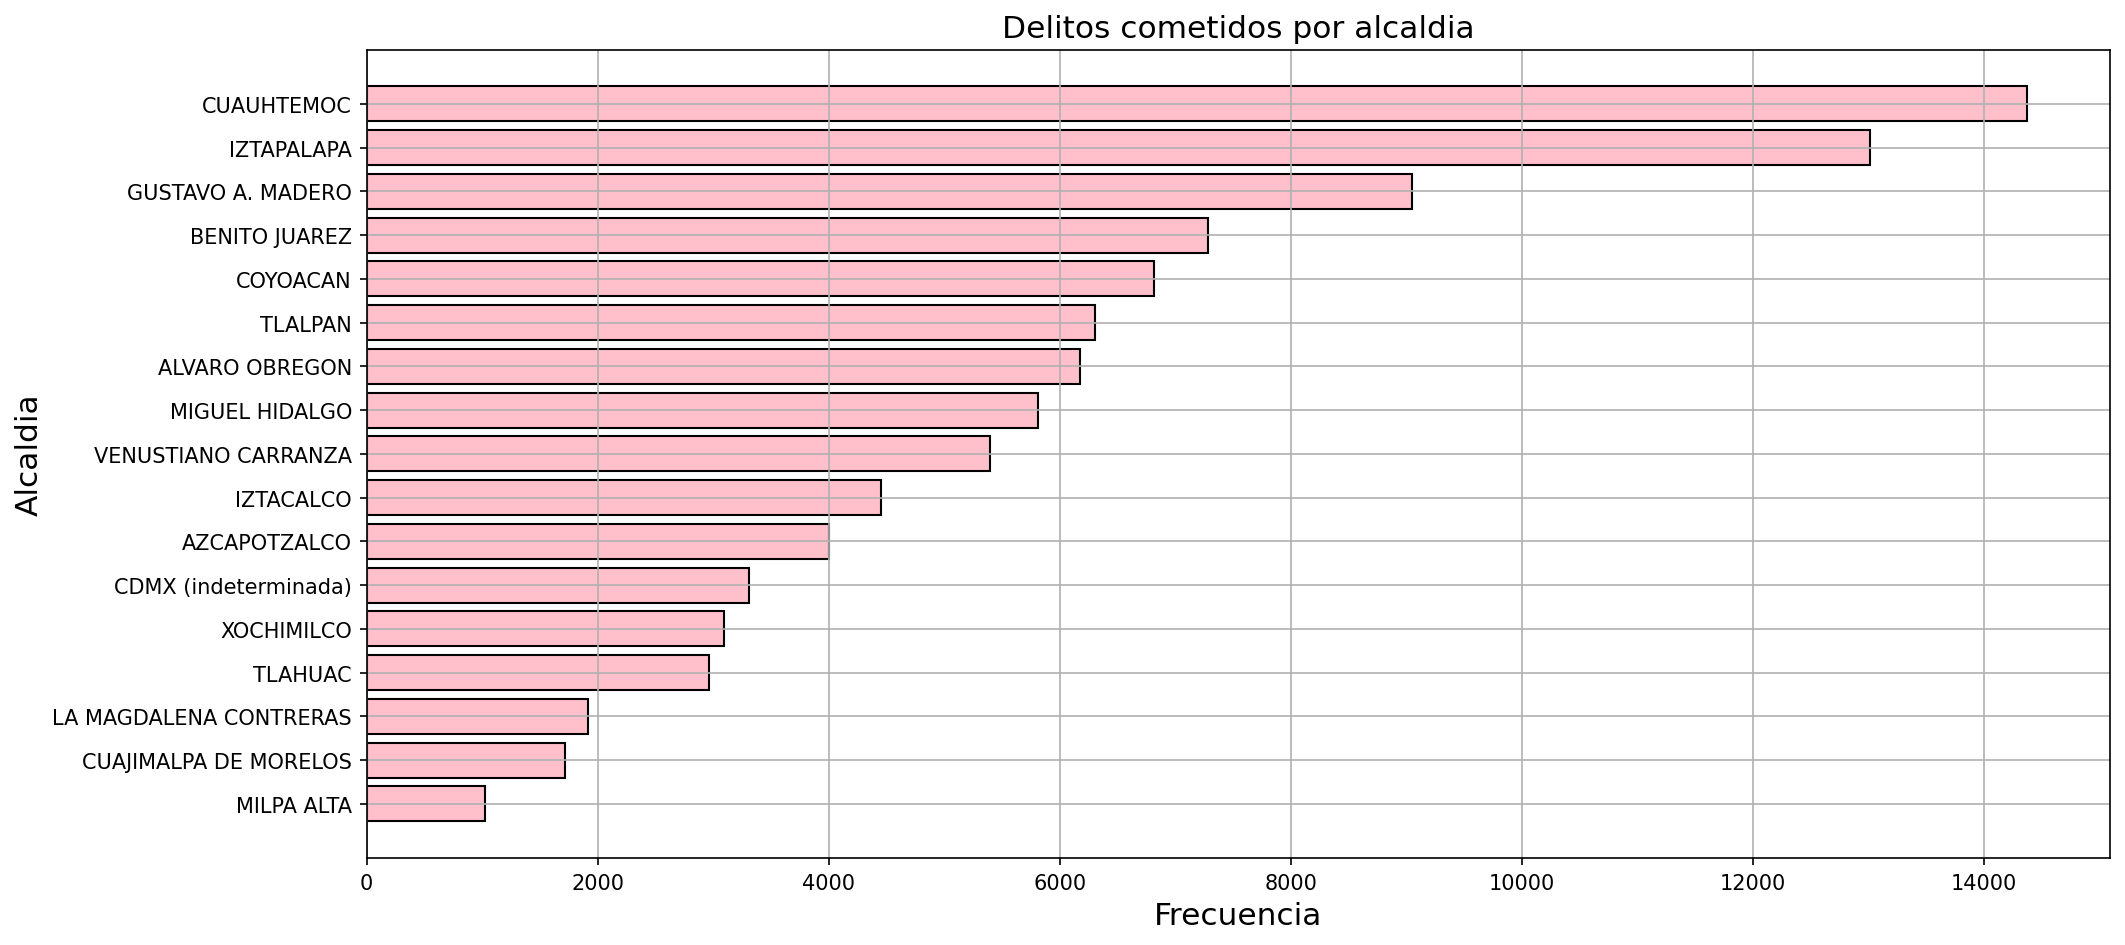

In [15]:
#grafica de Data Frame de delitos cometidos por alcaldia
plt.figure(figsize=(15,7), dpi=150)
plt.barh(delitos_alcaldia['alcaldia_hecho'], delitos_alcaldia['cantidad_delitos']
         ,facecolor='pink', edgecolor='black')
plt.title('Delitos cometidos por alcaldia', fontsize = 15)
plt.xlabel('Frecuencia', fontsize = 15)
plt.ylabel('Alcaldia', fontsize = 15)
plt.gca().invert_yaxis()
plt.grid(True)

Obtenga un Dataframe con los delitos cometidos por categoría y un gráfico que ilustre esto.

In [16]:
#Obtenga un Dataframe con los delitos cometidos por categoría y un gráfico que ilustre esto
delitos_categoria = piece.groupby('categoria_delito').size().reset_index(name='cantidad_delitos')
delitos_categoria = delitos_categoria.sort_values(by='cantidad_delitos', ascending=False)
delitos_categoria

,categoria_delito,cantidad_delitos
0,DELITO DE BAJO IMPACTO,83940
11,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,3907
1,HECHO NO DELICTIVO,3348
13,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,3273
15,VIOLACIÓN,1128
6,ROBO A NEGOCIO CON VIOLENCIA,823
9,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,532
3,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,516
2,HOMICIDIO DOLOSO,450
10,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,360


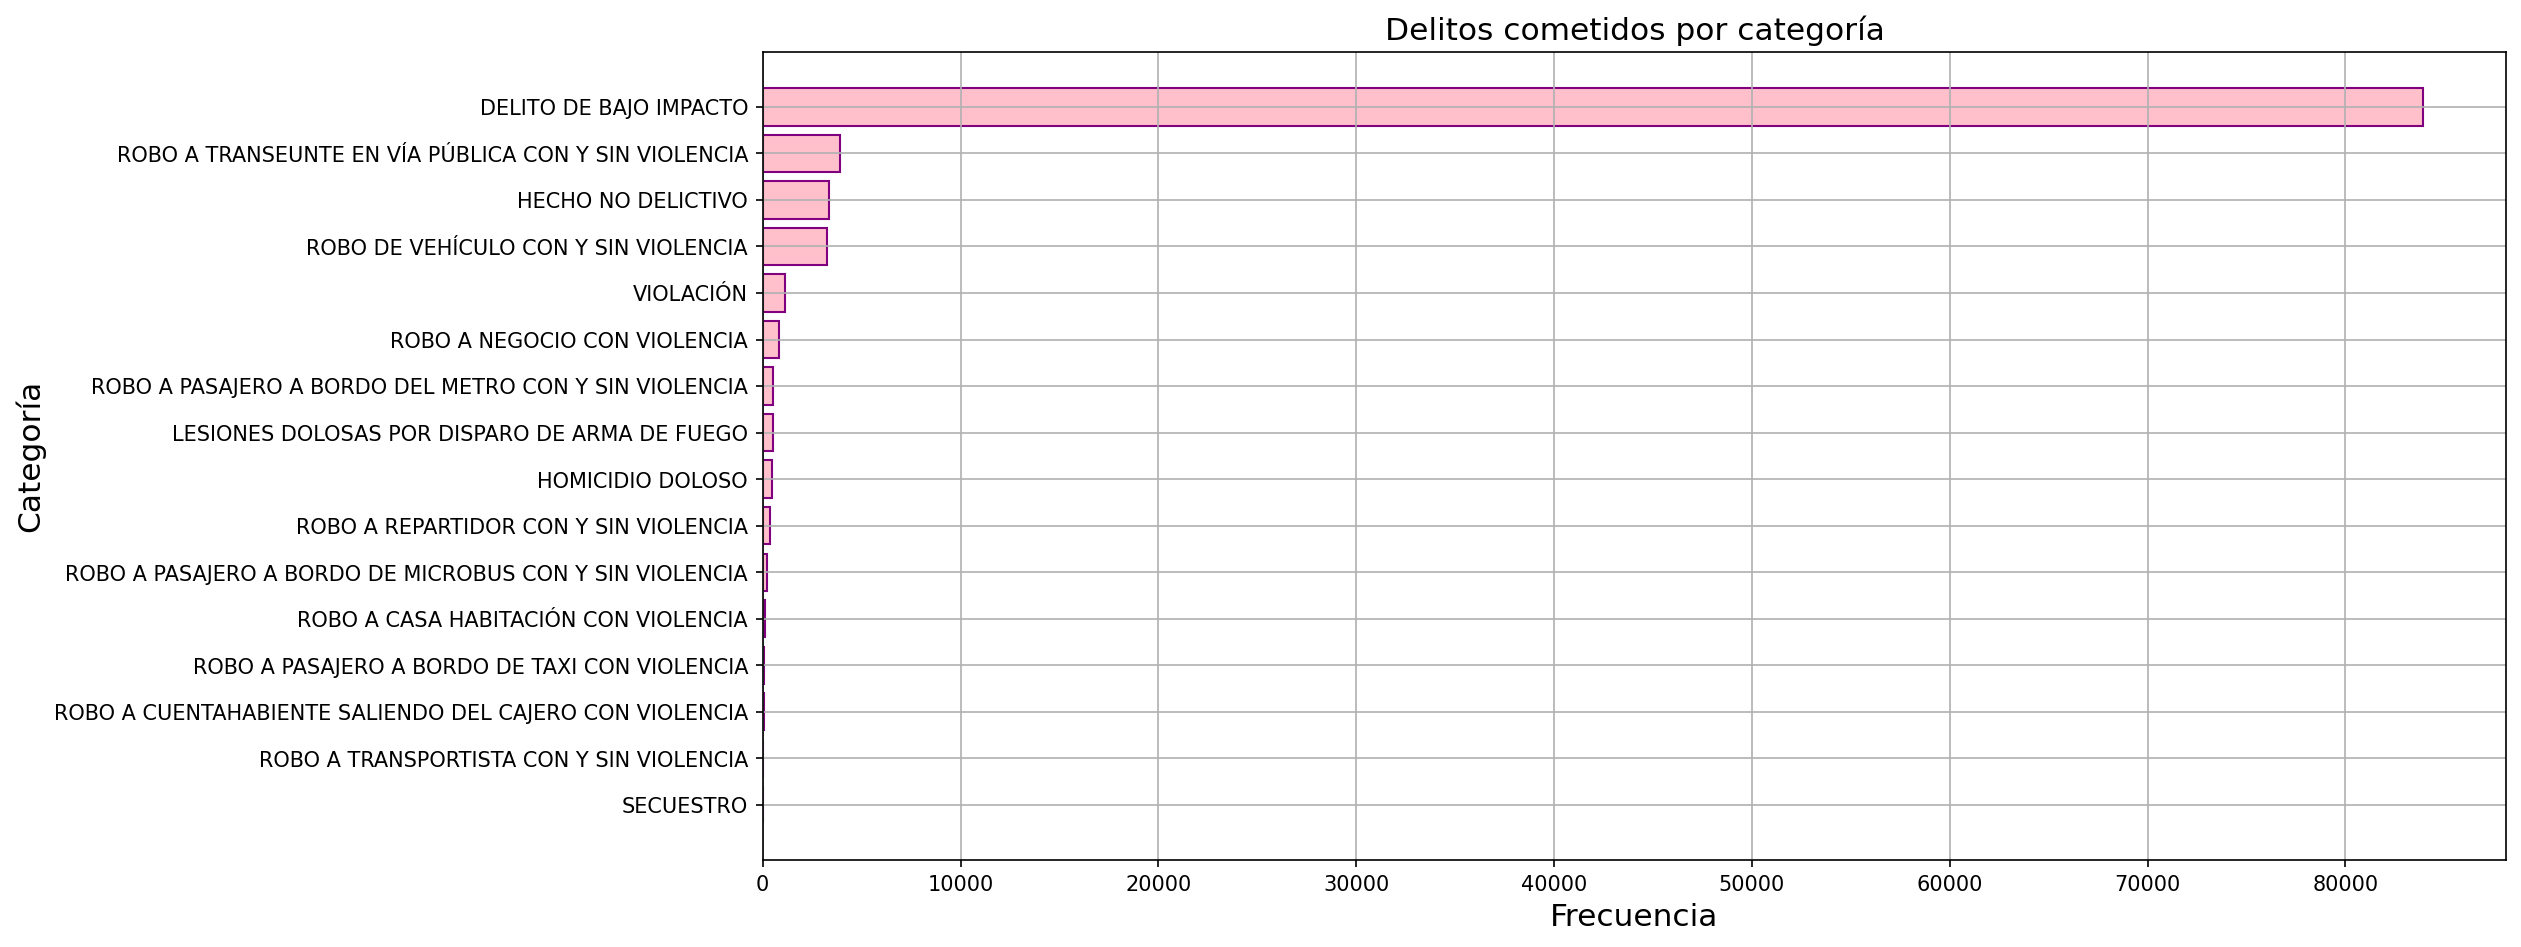

In [18]:
#grafica de Dataframe con los delitos cometidos por categoría y un gráfico que ilustre esto
plt.figure(figsize=(15,7), dpi=150)
plt.barh(delitos_categoria['categoria_delito'], delitos_categoria['cantidad_delitos']
         ,facecolor='pink', edgecolor='purple')
plt.title('Delitos cometidos por categoría', fontsize = 15)
plt.xlabel('Frecuencia', fontsize = 15)
plt.ylabel('Categoría', fontsize = 15)
plt.gca().invert_yaxis()
plt.grid(True)

In [19]:
#colonia_hecho
colonia_delitos = piece.groupby('colonia_hecho').size().reset_index(name='cantidad_delitos')
colonia_delitos = colonia_delitos.sort_values(by='cantidad_delitos', ascending=False)
colonia_delitos


,colonia_hecho,cantidad_delitos
306,CENTRO,3088
409,DOCTORES,1685
400,DEL VALLE CENTRO,1282
1183,ROMA NORTE,1133
679,JUÁREZ,1123
...,...,...
41,ACOCA,1
639,IXTLAHUALTONGO,1
1496,TRONCOSO,1
1499,U.H. TLALTEPA,1


In [20]:
colonia_delitos.head(5)

,colonia_hecho,cantidad_delitos
306,CENTRO,3088
409,DOCTORES,1685
400,DEL VALLE CENTRO,1282
1183,ROMA NORTE,1133
679,JUÁREZ,1123


In [21]:
top_5_colonias = colonia_delitos.head(5)

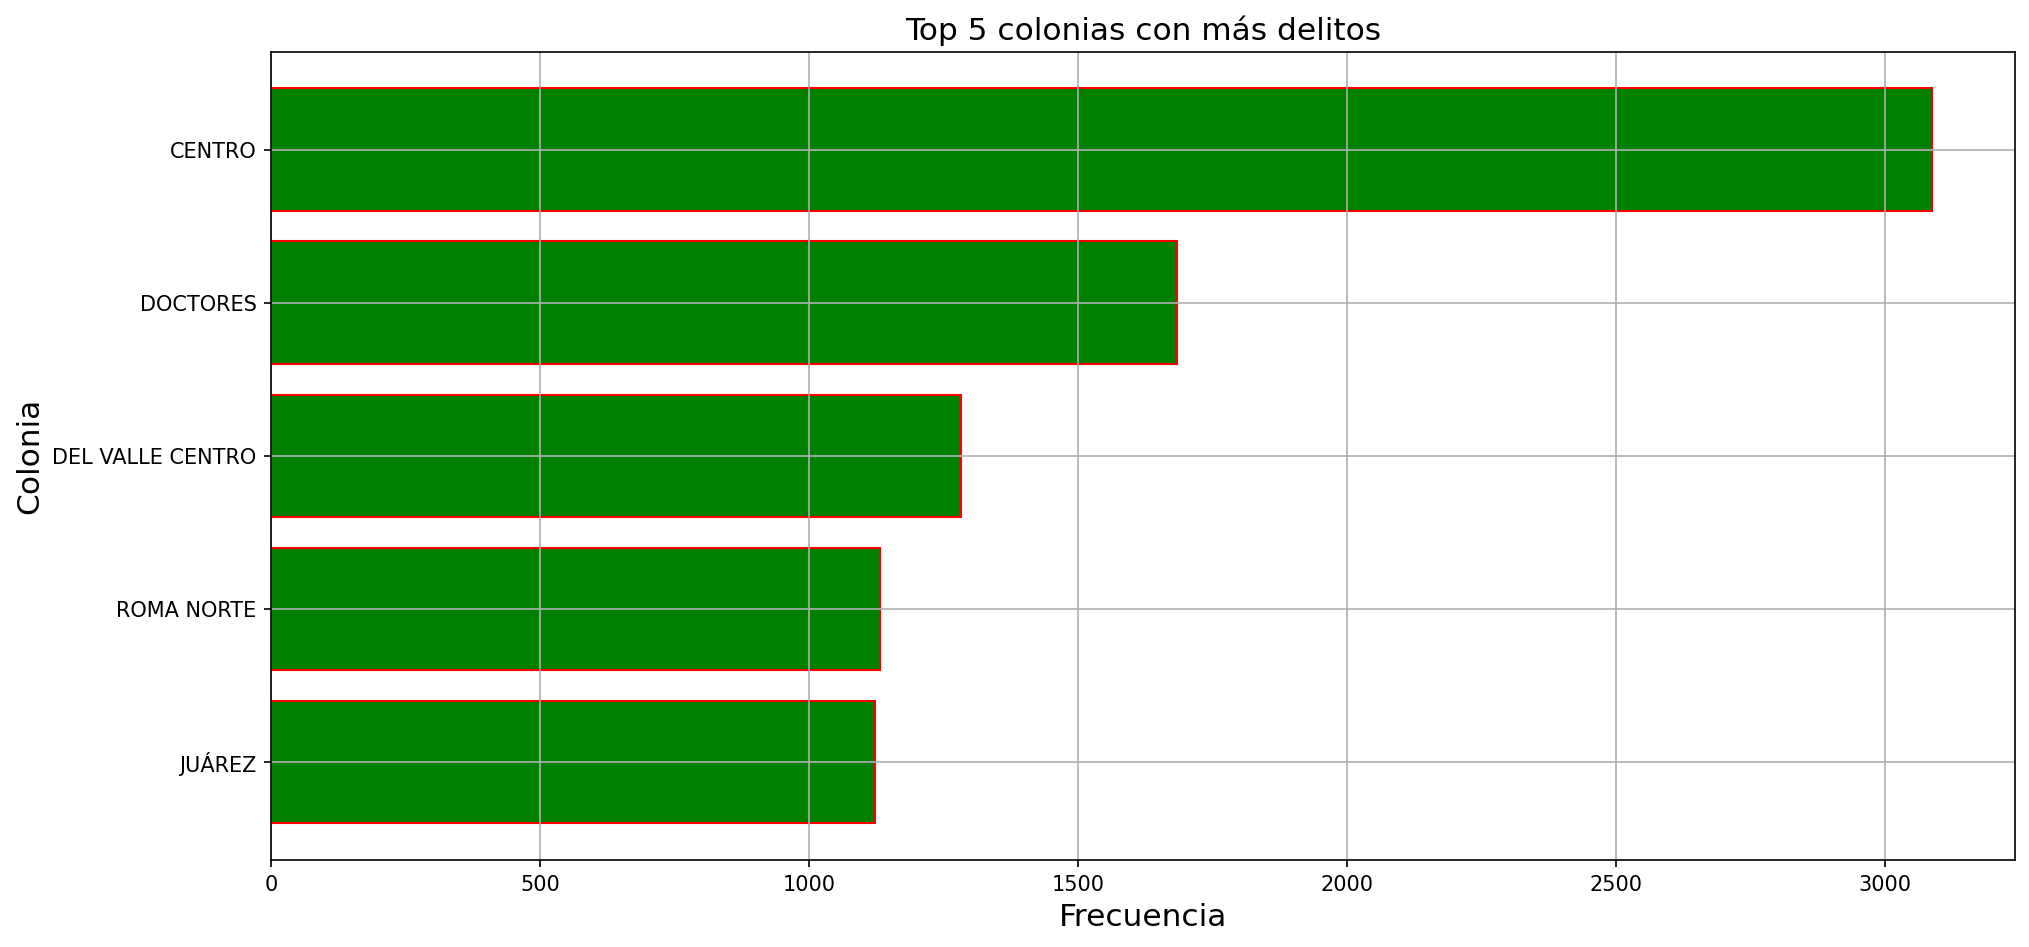

In [23]:
#gradico de las 5 colonias con mas delitos
plt.figure(figsize=(15,7), dpi=150)
plt.barh(top_5_colonias['colonia_hecho'], top_5_colonias['cantidad_delitos']
         ,facecolor='green', edgecolor='red')
plt.title('Top 5 colonias con más delitos', fontsize = 15)
plt.xlabel('Frecuencia', fontsize = 15)
plt.ylabel('Colonia', fontsize = 15)
plt.gca().invert_yaxis()
plt.grid(True)

¿En que hora se registraron más delitos?

La hora con más delitos es al medio dia es decir a laas 12:00 pm



In [24]:
#hora en la que se reistraron mas delitos
hora_delitos = piece.groupby('hora_inicio').size().reset_index(name='cantidad_delitos')
hora_delitos = hora_delitos.sort_values(by='cantidad_delitos', ascending=False)
hora_delitos

,hora_inicio,cantidad_delitos
25776,18:03:00,76
11756,12:01:00,70
15298,13:30:00,69
18192,14:42:00,69
16318,13:55:00,68
...,...,...
19,00:00:38:00,1
20,00:00:39:00,1
21,00:00:40:00,1
22,00:00:44:00,1


In [25]:

horas = Counter()

for chunk in pd.read_csv(ruta, chunksize=100_000):
    horas_chunk = chunk['hora_hecho'].dropna().astype(str).str[:2]  # Solo HH de HH:MM:SS
    horas.update(horas_chunk)

df_horas = pd.DataFrame(horas.items(), columns=['Hora', 'Delitos'])
df_horas = df_horas.sort_values(by='Delitos', ascending=False).reset_index(drop=True)

/tmp/ipython-input-25-3155736582.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(ruta, chunksize=100_000):
/tmp/ipython-input-25-3155736582.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(ruta, chunksize=100_000):
/tmp/ipython-input-25-3155736582.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(ruta, chunksize=100_000):
/tmp/ipython-input-25-3155736582.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(ruta, chunksize=100_000):
/tmp/ipython-input-25-3155736582.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(ruta, chunksize=100_000):
/tmp/ipython-input-25-3155736582.py

In [26]:
# Filtrar solo horas de 2 dígitos que sean números
df_horas = df_horas[df_horas['Hora'].str.fullmatch(r'\d{2}')].copy()
df_horas['Hora'] = df_horas['Hora'].astype(int)
df_horas = df_horas.sort_values(by='Hora')

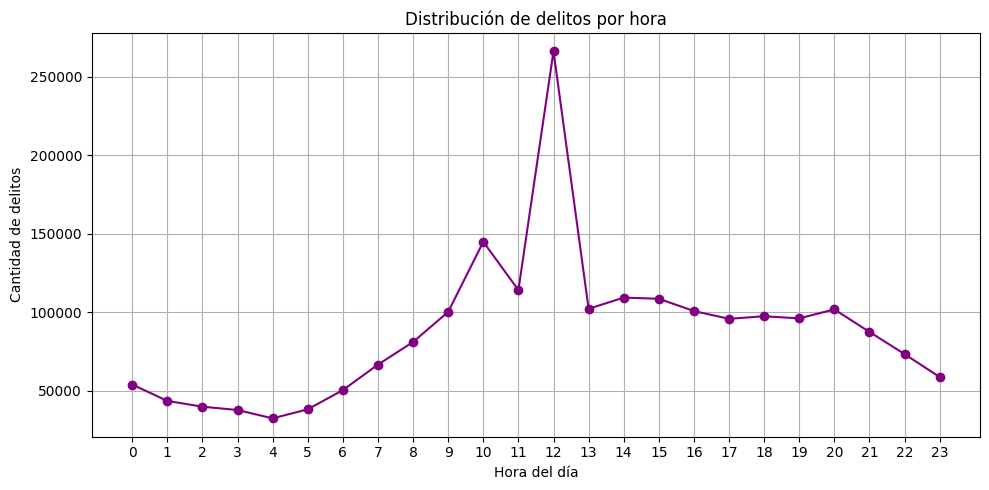

In [27]:
df_horas['Hora'] = df_horas['Hora'].astype(int)
df_horas = df_horas.sort_values(by='Hora')

plt.figure(figsize=(10,5))
plt.plot(df_horas['Hora'], df_horas['Delitos'], marker='o', color = 'purple')
plt.xticks(range(0,24))
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de delitos')
plt.title('Distribución de delitos por hora')
plt.grid(True)
plt.tight_layout()
plt.show()

:::¿Cuales son las 3 alcaldias que registraron menos delitos?

Son Cuajimalpa de Morelos, Milpa Alta y CDMX (indeterminada)

In [28]:
#¿Cuales son las 3 alcaldias que registraron menos delitos?
alcaldia_delitos = piece.groupby('alcaldia_hecho').size().reset_index(name='cantidad_delitos')
alcaldia_delitos = alcaldia_delitos.sort_values(by='cantidad_delitos', ascending=True)
alcaldia_delitos

,alcaldia_hecho,cantidad_delitos
12,MILPA ALTA,1023
5,CUAJIMALPA DE MORELOS,1718
10,LA MAGDALENA CONTRERAS,1916
13,TLAHUAC,2967
16,XOCHIMILCO,3099
3,CDMX (indeterminada),3310
1,AZCAPOTZALCO,4005
8,IZTACALCO,4454
15,VENUSTIANO CARRANZA,5397
11,MIGUEL HIDALGO,5816


** 2.Extraiga las tablas que aparecen en la página web:**

In [61]:
ruta = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_M%C3%A9xico'
liga= pd.read_html(ruta)
liga

[                           Liga MX  \
 0             Torneo Apertura 2025   
 1   Logo oficial de la competición   
 2                  Datos generales   
 3                             Sede   
 4                       Asociación   
 5                        Categoría   
 6                     Inauguración   
 7                          Edición   
 8                 N.º de ediciones   
 9                      Organizador   
 10                    Patrocinador   
 11                      TV oficial   
 12                        Palmarés   
 13                         Campeón   
 14                      Subcampeón   
 15              Datos estadísticos   
 16                   Participantes   
 17                        Partidos   
 18                    Más laureado   
 19                  Más presencias   
 20                        Descenso   
 21                   Copa Nacional   
 22                      Super Copa   
 23                 Clasificación a   
 24                      

Obtenga un gráfico de la capacidad de los estadios de la liga mx en orden descendente.

In [62]:
len(liga)

15

In [63]:
liga[0]

,Liga MX,Liga MX.1,Liga MX.2
0,Torneo Apertura 2025,Torneo Apertura 2025,Torneo Apertura 2025
1,Logo oficial de la competición,Logo oficial de la competición,Logo oficial de la competición
2,Datos generales,Datos generales,Datos generales
3,Sede,México,México
4,Asociación,Concacaf,Concacaf
5,Categoría,Primera Categoría,Primera Categoría
6,Inauguración,1902-03 (Amateur) 1943-44 (Profesional),1902-03 (Amateur) 1943-44 (Profesional)
7,Edición,38 y 108,38 y 108
8,N.º de ediciones,Amateur (1902-1943) - 38 Profesional (1943-Act...,Amateur (1902-1943) - 38 Profesional (1943-Act...
9,Organizador,Federación Mexicana de Fútbol (FMF),Federación Mexicana de Fútbol (FMF)


In [64]:
liga[0].columns

Index(['Liga MX', 'Liga MX.1', 'Liga MX.2'], dtype='object')

In [65]:
for i, df in enumerate(liga):
    print(f"liga {i} columnas: {df.columns}")

liga 0 columnas: Index(['Liga MX', 'Liga MX.1', 'Liga MX.2'], dtype='object')
liga 1 columnas: Index([0, 1], dtype='int64')
liga 2 columnas: Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
liga 3 columnas: MultiIndex([( 'Temporada', 'Liga Mexicana de Foot-ball Association'),
            (   'Campeón', 'Liga Mexicana de Foot-ball Association'),
            ( 'Resultado', 'Liga Mexicana de Foot-ball Association'),
            ('Subcampeón', 'Liga Mexicana de Foot-ball Association'),
            (     'Notas', 'Liga Mexicana de Foot-ball Association')],
           )
liga 4 columnas: Index(['Club', 'Títulos', 'Subtítulos', 'Años de los campeonatos',
       'Años subcampeón'],
      dtype='object')
liga 5 columnas: Index(['Pos', 'Unnamed: 1', 'Club', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'Dif.',
       'Puntos'],
      dtype='object')
liga 6 columnas: Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
liga 7 columnas: Index(['Pos.', 'Jugador', 'G.', 'Liga', 'LGL', 'Part.', 'Prom.', 'Período',
    

In [66]:
import pandas as pd

datos = {
    'Estadio': [
        "Estadio Azteca", "Estadio Olímpico Universitario", "Estadio Jalisco",
        "Estadio BBVA Bancomer", "Estadio Cuauhtémoc", "Estadio Chivas",
        "Estadio Universitario (Tigres)", "Estadio Azul", "Estadio Morelos",
        "Estadio Corregidora", "Estadio Nemesio Díez", "Estadio León",
        "Estadio TSM Corona", "Estadio Luis \"Pirata\" Fuente", "Estadio Hidalgo"
    ],
    'Capacidad': [
        87000, 68297, 53985, 52237, 51726, 49850,
        41615, 33000, 34984, 33162, 25257,
        31297, 29237, 28703, 27512
    ]
}

df_estadios = pd.DataFrame(datos)


In [67]:
df_estadios

,Estadio,Capacidad
0,Estadio Azteca,87000
1,Estadio Olímpico Universitario,68297
2,Estadio Jalisco,53985
3,Estadio BBVA Bancomer,52237
4,Estadio Cuauhtémoc,51726
5,Estadio Chivas,49850
6,Estadio Universitario (Tigres),41615
7,Estadio Azul,33000
8,Estadio Morelos,34984
9,Estadio Corregidora,33162


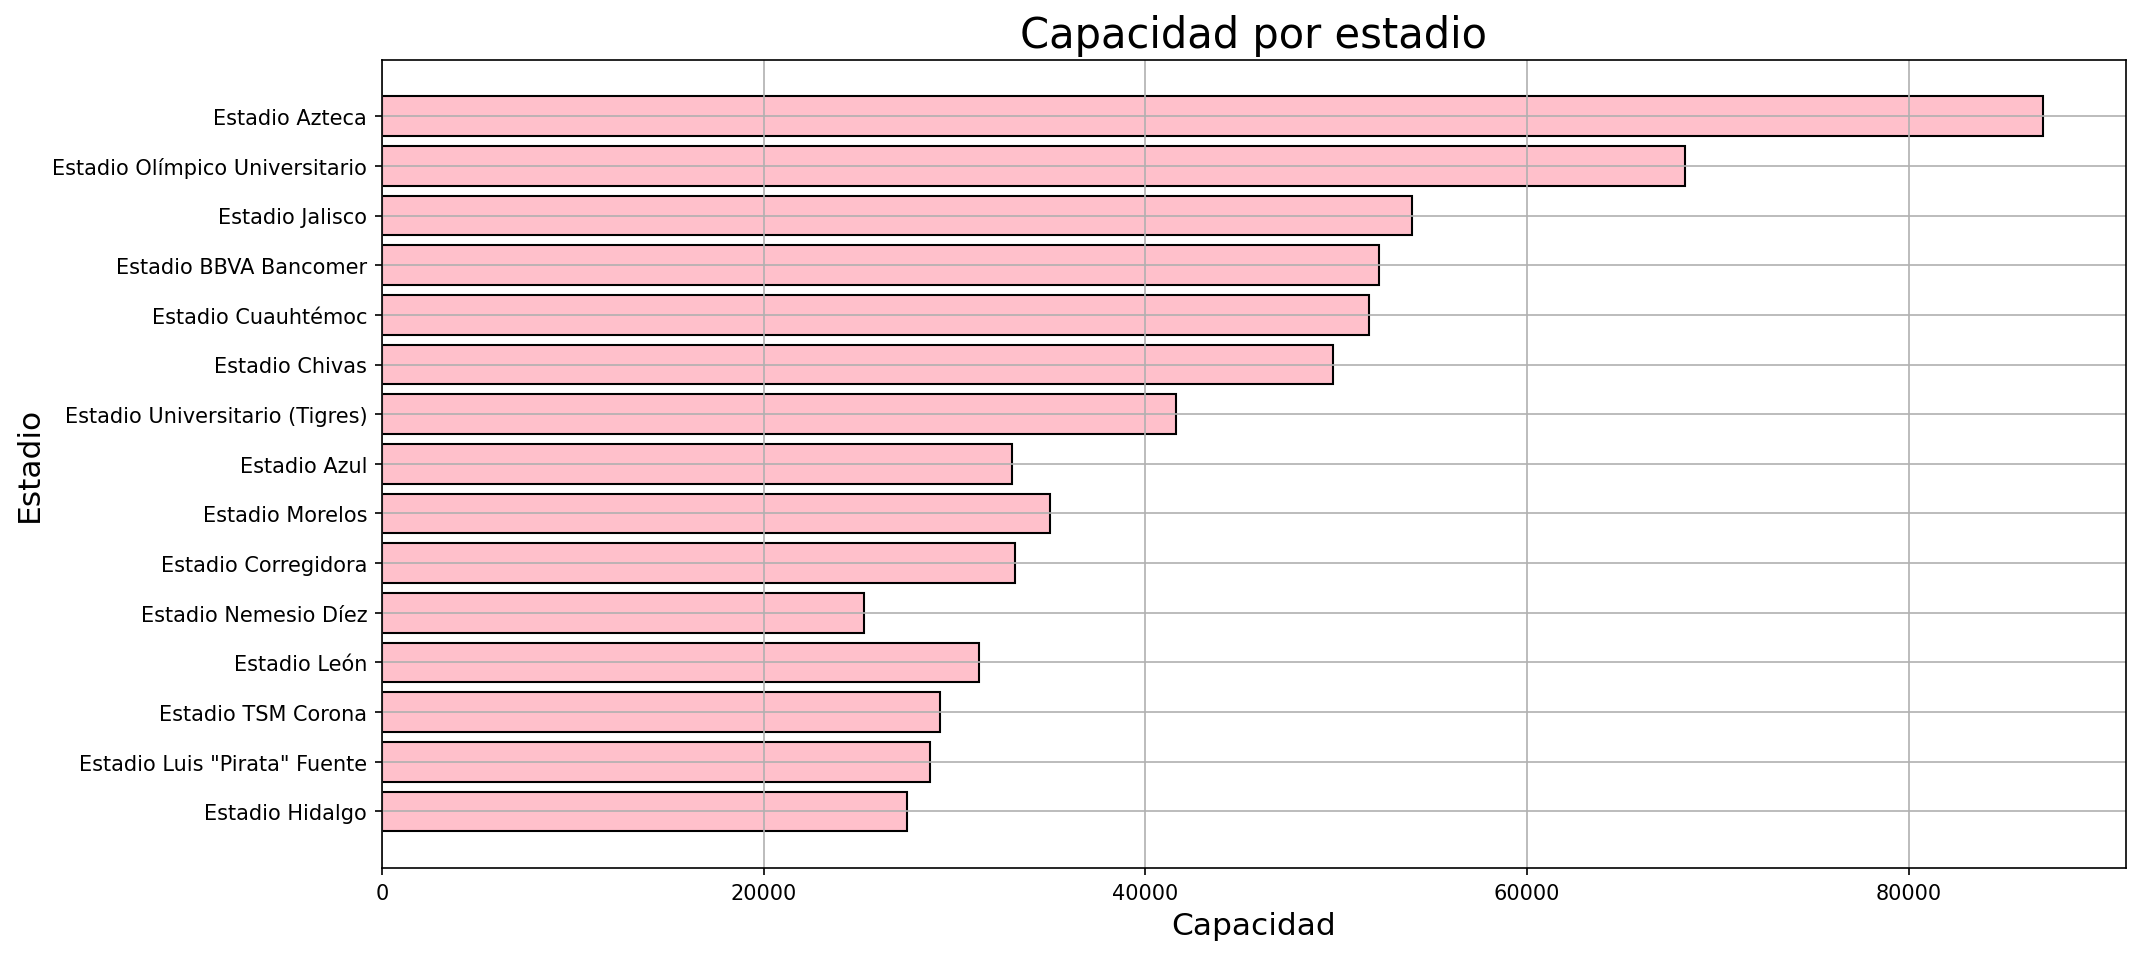

In [68]:
plt.figure(figsize=(15,7), dpi=150)
plt.barh(df_estadios.index, df_estadios['Capacidad'], facecolor = 'pink', edgecolor = 'black')
plt.title('Capacidad por estadio', fontsize=20)
plt.xlabel('Capacidad', fontsize=15)
plt.ylabel('Estadio', fontsize=15)
plt.yticks(df_estadios.index, df_estadios['Estadio'])
plt.gca().invert_yaxis()
plt.grid()
plt.show()

**Obtenga un gráfico de los 10 equipos con más títulos en orden ascendente.**

In [69]:
titulos = liga[4]
titulos.head(10)


,Club,Títulos,Subtítulos,Años de los campeonatos,Años subcampeón
0,C. F. América,16,11,"1965-66, 1970-71, 1975-76, 1983-84, 1984-85, P...","1959-60, 1961-62, 1963-64, 1966-67, 1971-72, 1..."
1,C. D. Guadalajara,12,10,"1956-57, 1958-59, 1959-60, 1960-61, 1961-62, 1...","1951-52, 1954-55, 1962-63, 1968-69, M-1970, 19..."
2,Deportivo Toluca F. C.,11,8,"1966-67, 1967-68, 1974-75, V-1998, V-1999, V-2...","1956-57, 1957-58, 1970-71, I-2000, A-2006, A-2..."
3,C. D. Cruz Azul,9,12,"1968-69, M-1970, 1971-72, 1972-73, 1973-74, 19...","1969-70, 1980-81, 1986-87, 1988-89, 1994-95, I..."
4,Club León,8,7,"1947-48, 1948-49, 1951-52, 1955-56, 1991-92, A...","1946-47, 1958-59, 1972-73, 1974-75, I-1997, C-..."
5,C. F. Tigres UANL,8,6,"1977-78, 1981-82, A-2011, A-2015, A-2016, A-20...","1979-80, I-2001, A-2003, A-2014, C-2017 y A-2023"
6,Universidad Nacional,7,8,"1976-77, 1980-81, 1990-91, C-2004, A-2004, C-2...","1967-68, 1977-78, 1978-79, 1984-85, 1987-88, A..."
7,C. F. Pachuca,7,4,"I-1999, I-2001, A-2003, C-2006, C-2007, C-2016...","V-2001, C-2009, C-2014 y C-2022"
8,Santos Laguna,6,6,"I-1996, V-2001, C-2008, C-2012, C-2015 y C-2018","1993-94, V-2000, B-2010, A-2010, A-2011 y G-2021"
9,C. F. Monterrey,5,7,"M-1986, C-2003, A-2009, A-2010 y A-2019","1992-93, A-2004, A-2005, C-2012, C-2016, A-201..."


In [70]:
titulos.columns

Index(['Club', 'Títulos', 'Subtítulos', 'Años de los campeonatos',
       'Años subcampeón'],
      dtype='object')

In [71]:
titulos = titulos[['Club', 'Títulos']]

In [72]:
titulos

,Club,Títulos
0,C. F. América,16
1,C. D. Guadalajara,12
2,Deportivo Toluca F. C.,11
3,C. D. Cruz Azul,9
4,Club León,8
5,C. F. Tigres UANL,8
6,Universidad Nacional,7
7,C. F. Pachuca,7
8,Santos Laguna,6
9,C. F. Monterrey,5


In [73]:
titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Club     31 non-null     object
 1   Títulos  31 non-null     object
dtypes: object(2)
memory usage: 628.0+ bytes


In [74]:
set[titulos['Títulos']]

set[0     16
1     12
2     11
3      9
4      8
5      8
6      7
7      7
8      6
9      5
10     3
11     3
12     3
13     2
14     2
15     2
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     -
25     -
26     -
27     -
28     -
29     -
30     -
Name: Títulos, dtype: object]

In [54]:
from os import replace


In [75]:
#como tenemos datos tipo objeto en Títulos los volvemos tipo entero
titulos[('Títulos')] = titulos[('Títulos')].str.replace('-', '0', regex=False)
titulos[('Títulos')] = titulos[('Títulos')].astype(int)

/tmp/ipython-input-75-3196228439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titulos[('Títulos')] = titulos[('Títulos')].str.replace('-', '0', regex=False)
/tmp/ipython-input-75-3196228439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titulos[('Títulos')] = titulos[('Títulos')].astype(int)


In [76]:
titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Club     31 non-null     object
 1   Títulos  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 628.0+ bytes


In [77]:
titulos

,Club,Títulos
0,C. F. América,16
1,C. D. Guadalajara,12
2,Deportivo Toluca F. C.,11
3,C. D. Cruz Azul,9
4,Club León,8
5,C. F. Tigres UANL,8
6,Universidad Nacional,7
7,C. F. Pachuca,7
8,Santos Laguna,6
9,C. F. Monterrey,5


In [79]:
lista_10 = titulos.sort_values(by='Títulos', ascending=False).head(10)

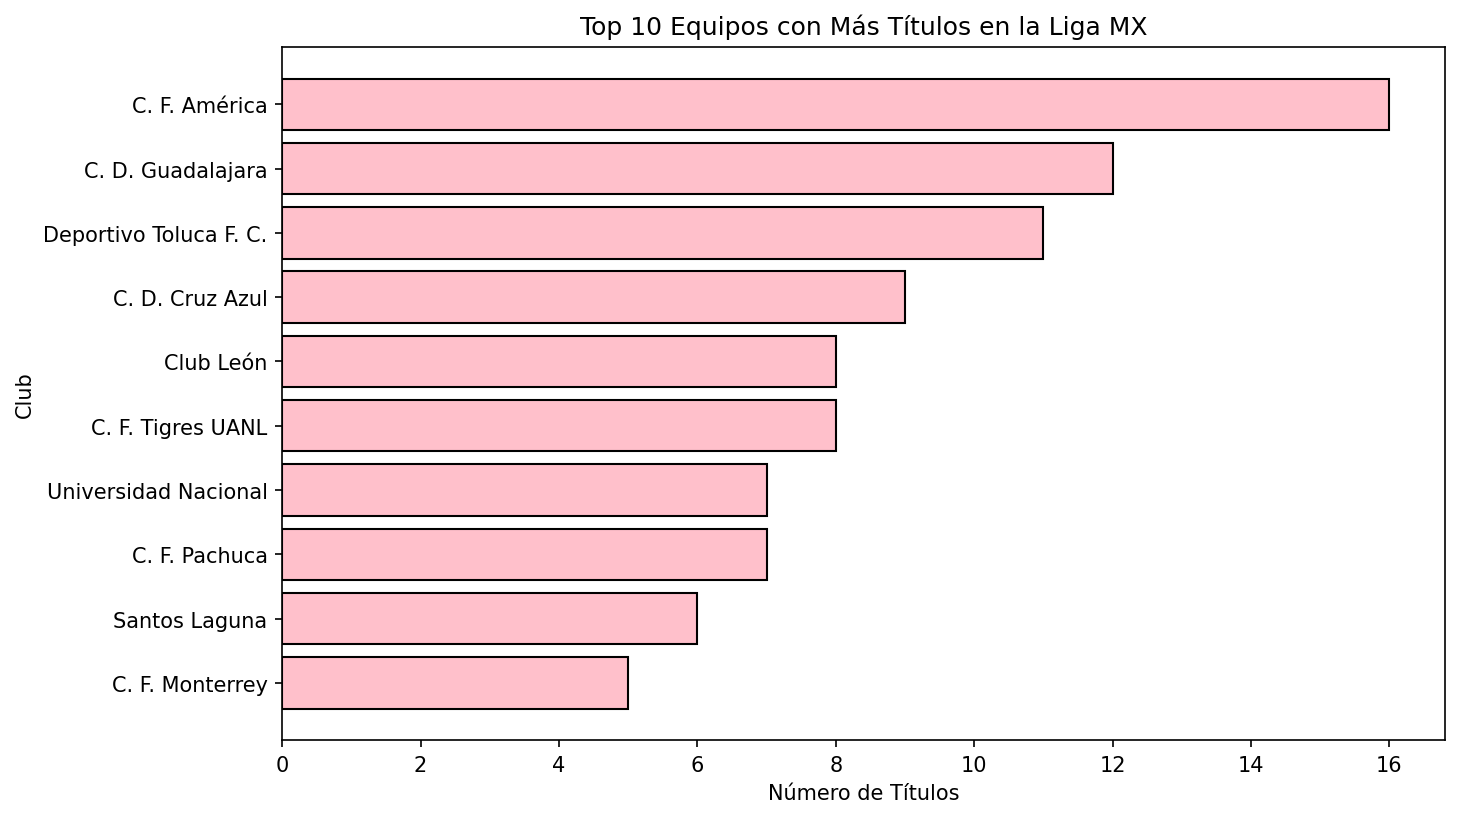

In [80]:
plt.figure(figsize=(10, 6), dpi=150)
plt.barh(lista_10[('Club')].values, lista_10[('Títulos')].values, color='pink', edgecolor='black')
plt.gca().invert_yaxis()
plt.xlabel('Número de Títulos')
plt.ylabel('Club')
plt.title('Top 10 Equipos con Más Títulos en la Liga MX')
plt.show()

Obtenga un gráfico de directores técnicos con más títulos en orden ascendente.

In [81]:
directores = liga[11]

In [82]:
directores

,N.º,Entrenador,Títulos,Periodo,Equipos,Campeonatos
0,1,Ignacio Trelles,7,1951 - 1991,"Marte (1), Zacatepec (2), Deportivo Toluca (2)...","1953-54, 1954-55, 1957-58, 1966-67, 1967-68, 1..."
1,1,Ricardo Ferretti,7,1991 -,"Guadalajara (1), UNAM (1), Tigres UANL (5)","V1997, C2009, A2011, A2015, A2016, A2017, C2019"
2,3,Raúl Cárdenas,6,1966 - 1998,"Cruz Azul (5), América (1)","1968-69, México 1970, 1971-72, 1972-73, 1973-7..."
3,4,Javier de la Torre,5,1955 - 1984,Guadalajara (5),"1960-61, 1961-62, 1963-64, 1964-65, 1969-70"
4,4,Manuel Lapuente,5,1978 - 2013,"Puebla (2), Necaxa (2), América (1)","1982-83, 1989-90, 1994-95, 1995-96, V2002"
5,4,Víctor Manuel Vucetich,5,1990 -,"León (1), Tecos (1), Pachuca (1), Monterrey (2)","1991-92, 1993-94, A2003, A2009, A2010"
6,7,Enrique Meza,4,1982 -,"Toluca (3), Pachuca (1)","V1998, V1999, V2000, C2007"
7,7,Antonio Mohamed,4,2004 -,"Tijuana (1), América (1), Monterrey (1), Toluc...","A2012, A2014, A2019, C2025"
8,8,Árpád Fekete,3,1957 - 1990,"Guadalajara (2), Club Oro (1)","1958-59, 1959-60, 1962-63"
9,8,José Manuel de la Torre,3,2006 -,"Guadalajara (1), Toluca (2)","A2006, A2008, Bicentenario 2010"


In [84]:
directores.columns

Index(['N.º', 'Entrenador', 'Títulos', 'Periodo', 'Equipos', 'Campeonatos'], dtype='object')

In [85]:
directores=directores[['Entrenador', 'Títulos']]

In [86]:
directores

,Entrenador,Títulos
0,Ignacio Trelles,7
1,Ricardo Ferretti,7
2,Raúl Cárdenas,6
3,Javier de la Torre,5
4,Manuel Lapuente,5
5,Víctor Manuel Vucetich,5
6,Enrique Meza,4
7,Antonio Mohamed,4
8,Árpád Fekete,3
9,José Manuel de la Torre,3


In [87]:
directores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Entrenador  11 non-null     object
 1   Títulos     11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


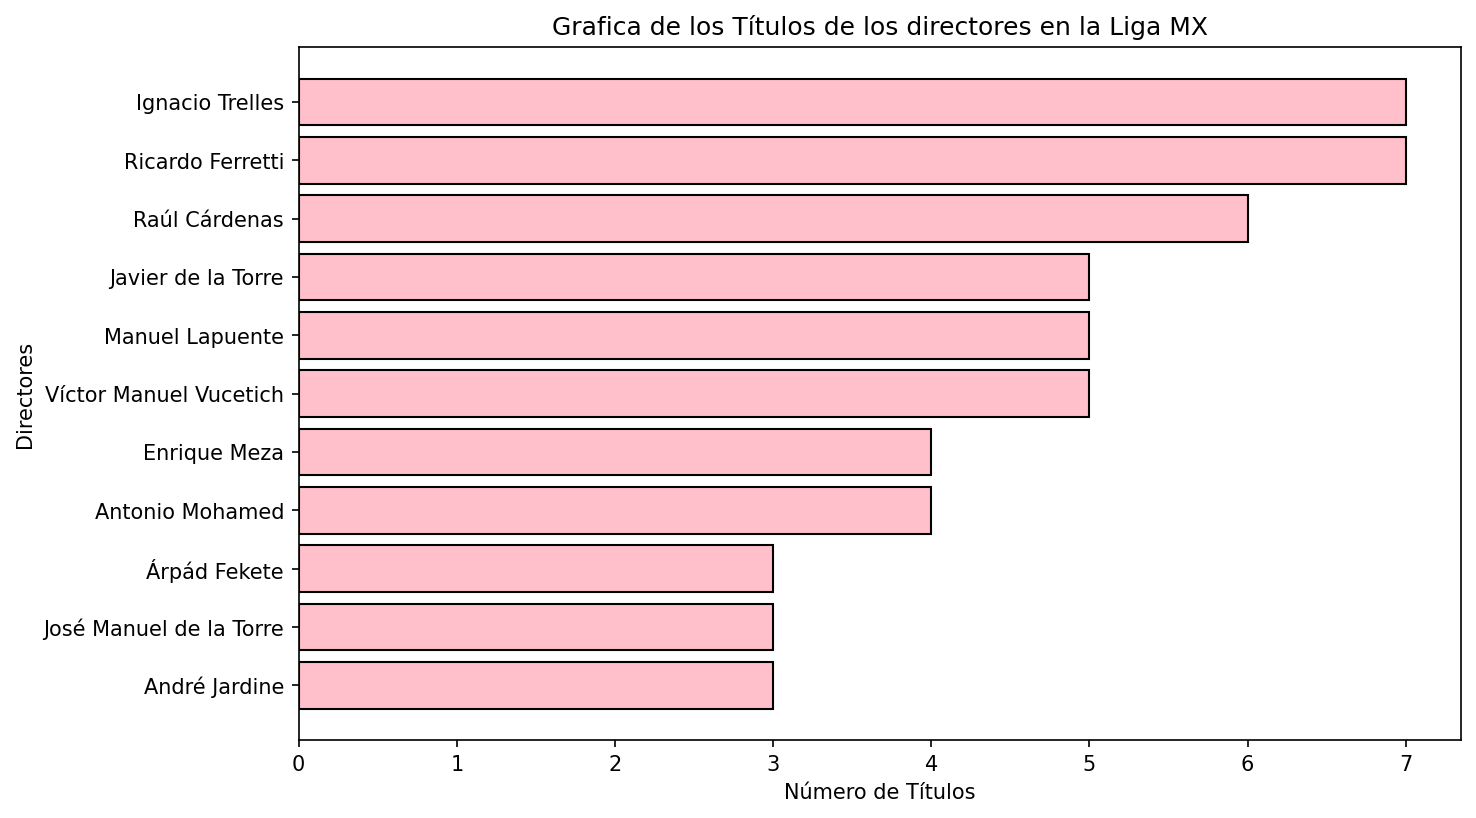

In [89]:
plt.figure(figsize=(10, 6), dpi=150)
plt.barh(directores[('Entrenador')].values, directores[('Títulos')].values, color='pink', edgecolor='black')
plt.gca().invert_yaxis()
plt.xlabel('Número de Títulos')
plt.ylabel('Directores')
plt.title('Grafica de los Títulos de los directores en la Liga MX')
plt.show()

De la tabla de directores técnicos con más títulos conteste lo siguiente: ¿Cuantos de estos directores técnicos conquistaron un título con Guadalajara? ¿Cuantos de estos directores técnicos conquistaron un título con América? (Utilice variables dummy).

In [91]:
directores1= liga[11]

In [92]:
directores1

,N.º,Entrenador,Títulos,Periodo,Equipos,Campeonatos
0,1,Ignacio Trelles,7,1951 - 1991,"Marte (1), Zacatepec (2), Deportivo Toluca (2)...","1953-54, 1954-55, 1957-58, 1966-67, 1967-68, 1..."
1,1,Ricardo Ferretti,7,1991 -,"Guadalajara (1), UNAM (1), Tigres UANL (5)","V1997, C2009, A2011, A2015, A2016, A2017, C2019"
2,3,Raúl Cárdenas,6,1966 - 1998,"Cruz Azul (5), América (1)","1968-69, México 1970, 1971-72, 1972-73, 1973-7..."
3,4,Javier de la Torre,5,1955 - 1984,Guadalajara (5),"1960-61, 1961-62, 1963-64, 1964-65, 1969-70"
4,4,Manuel Lapuente,5,1978 - 2013,"Puebla (2), Necaxa (2), América (1)","1982-83, 1989-90, 1994-95, 1995-96, V2002"
5,4,Víctor Manuel Vucetich,5,1990 -,"León (1), Tecos (1), Pachuca (1), Monterrey (2)","1991-92, 1993-94, A2003, A2009, A2010"
6,7,Enrique Meza,4,1982 -,"Toluca (3), Pachuca (1)","V1998, V1999, V2000, C2007"
7,7,Antonio Mohamed,4,2004 -,"Tijuana (1), América (1), Monterrey (1), Toluc...","A2012, A2014, A2019, C2025"
8,8,Árpád Fekete,3,1957 - 1990,"Guadalajara (2), Club Oro (1)","1958-59, 1959-60, 1962-63"
9,8,José Manuel de la Torre,3,2006 -,"Guadalajara (1), Toluca (2)","A2006, A2008, Bicentenario 2010"


In [93]:
directores1= directores1[['Entrenador', 'Equipos']]

In [94]:
pd.get_dummies(directores1['Entrenador'], dtype=int).sum()

,0
André Jardine,1
Antonio Mohamed,1
Enrique Meza,1
Ignacio Trelles,1
Javier de la Torre,1
José Manuel de la Torre,1
Manuel Lapuente,1
Raúl Cárdenas,1
Ricardo Ferretti,1
Víctor Manuel Vucetich,1


In [95]:
directores1 = pd.DataFrame(data=directores1)

In [96]:
directores1['Guadalajara'] = directores1['Equipos'].str.contains('Guadalajara').astype(int)
directores1['América'] = directores1['Equipos'].str.contains('América').astype(int)

In [97]:
Guadalajara= directores1['Guadalajara'].sum()
America = directores1['América'].sum()

print(f"Técnicos que ganaron con Guadalajara: {Guadalajara}")
print(f"Técnicos que ganaron con América: {America}")

Técnicos que ganaron con Guadalajara: 4
Técnicos que ganaron con América: 4


In [99]:
# Técnicos que ganaron con Guadalajara
tecnicos_guadalajara = directores1[directores1['Guadalajara'] == 1]

# Técnicos que ganaron con América
tecnicos_america = directores1[directores1['América'] == 1]

In [100]:
tecnicos_guadalajara

,Entrenador,Equipos,Guadalajara,América
1,Ricardo Ferretti,"Guadalajara (1), UNAM (1), Tigres UANL (5)",1,0
3,Javier de la Torre,Guadalajara (5),1,0
8,Árpád Fekete,"Guadalajara (2), Club Oro (1)",1,0
9,José Manuel de la Torre,"Guadalajara (1), Toluca (2)",1,0


In [101]:
tecnicos_america

,Entrenador,Equipos,Guadalajara,América
2,Raúl Cárdenas,"Cruz Azul (5), América (1)",0,1
4,Manuel Lapuente,"Puebla (2), Necaxa (2), América (1)",0,1
7,Antonio Mohamed,"Tijuana (1), América (1), Monterrey (1), Toluc...",0,1
10,André Jardine,América (3),0,1


**3. Cargue los datos de los ingresos de la Ciudad de México en el año 2021 (ingresos_CDMX_2021.csv en GitHub) y realice lo siguiente:**

In [102]:
ruta ="https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/ingresos_CDMX_2021.csv"
ing_21=pd.read_csv(ruta)
ing_21

,ciclo,periodo,desc_tipo_recurso_clase,desc_rubro,desc_tipo,desc_clase,desc_concepto,desc_concepto_esp,monto_recaudado
0,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Predial,NaN,NaN,1.247781e+10
1,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Adquisici¢n de Inmuebles,NaN,NaN,1.794347e+09
2,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Tenencia o Uso de Veh°culos,NaN,NaN,3.427249e+09
3,2021,Primer Trimestre,Ingresos locales,Impuestos,"Impuestos sobre la producci¢n, el consumo y la...",Sobre Espect†culos P£blicos,NaN,NaN,6.500144e+07
4,2021,Primer Trimestre,Ingresos locales,Impuestos,"Impuestos sobre la producci¢n, el consumo y la...","Sobre Loter°as, Rifas, Sorteos y Concursos",NaN,NaN,6.819808e+07
...,...,...,...,...,...,...,...,...,...
235,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboraciÛn fiscal,Por Multas Administrativas Impuestas por Autor...,NaN,NaN,7.920320e+06
236,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboraciÛn fiscal,Fondo de CompensaciÛn del ISAN,NaN,NaN,4.810378e+08
237,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboraciÛn fiscal,Fondo de CompensaciÛn del RÈgimen de PequeÒos ...,NaN,NaN,9.404845e+07
238,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Fondos Distintos de Aportaciones,NaN,NaN,NaN,5.161994e+08


**Elimine la cadena "desc_" en cada columna que la contenga.**

In [103]:
ing_21.columns = ing_21.columns.str.replace(r"^desc_", "", regex=True)

In [104]:
ing_21

,ciclo,periodo,tipo_recurso_clase,rubro,tipo,clase,concepto,concepto_esp,monto_recaudado
0,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Predial,NaN,NaN,1.247781e+10
1,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Adquisici¢n de Inmuebles,NaN,NaN,1.794347e+09
2,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Tenencia o Uso de Veh°culos,NaN,NaN,3.427249e+09
3,2021,Primer Trimestre,Ingresos locales,Impuestos,"Impuestos sobre la producci¢n, el consumo y la...",Sobre Espect†culos P£blicos,NaN,NaN,6.500144e+07
4,2021,Primer Trimestre,Ingresos locales,Impuestos,"Impuestos sobre la producci¢n, el consumo y la...","Sobre Loter°as, Rifas, Sorteos y Concursos",NaN,NaN,6.819808e+07
...,...,...,...,...,...,...,...,...,...
235,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboraciÛn fiscal,Por Multas Administrativas Impuestas por Autor...,NaN,NaN,7.920320e+06
236,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboraciÛn fiscal,Fondo de CompensaciÛn del ISAN,NaN,NaN,4.810378e+08
237,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboraciÛn fiscal,Fondo de CompensaciÛn del RÈgimen de PequeÒos ...,NaN,NaN,9.404845e+07
238,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Fondos Distintos de Aportaciones,NaN,NaN,NaN,5.161994e+08


Limpie las cadenas de caracteres contenidas en las columnas (esto es, elimine caracteres como Û, ¢, °, Ì, etc.)

In [105]:
import re

In [106]:
for col in ing_21.select_dtypes(include=['object', 'string']):
    ing_21[col] = ing_21[col].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', str(x)))

In [ ]:
ing_21

,ciclo,periodo,tipo_recurso_clase,rubro,tipo,clase,concepto,concepto_esp,monto_recaudado
0,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Predial,nan,nan,1.247781e+10
1,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Adquisicin de Inmuebles,nan,nan,1.794347e+09
2,2021,Primer Trimestre,Ingresos locales,Impuestos,Impuestos sobre el patrimonio,Sobre Tenencia o Uso de Vehculos,nan,nan,3.427249e+09
3,2021,Primer Trimestre,Ingresos locales,Impuestos,"Impuestos sobre la produccin, el consumo y las...",Sobre Espectculos Pblicos,nan,nan,6.500144e+07
4,2021,Primer Trimestre,Ingresos locales,Impuestos,"Impuestos sobre la produccin, el consumo y las...","Sobre Loteras, Rifas, Sorteos y Concursos",nan,nan,6.819808e+07
...,...,...,...,...,...,...,...,...,...
235,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboracin fiscal,Por Multas Administrativas Impuestas por Autor...,nan,nan,7.920320e+06
236,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboracin fiscal,Fondo de Compensacin del ISAN,nan,nan,4.810378e+08
237,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboracin fiscal,Fondo de Compensacin del Rgimen de Pequeos Con...,nan,nan,9.404845e+07
238,2021,Tercer Trimestre,Recursos federales,"Participaciones, Aportaciones, Convenios, Ince...",Fondos Distintos de Aportaciones,nan,nan,nan,5.161994e+08


La única variable numérica debe ser la variable "monto_recaudado".

In [107]:
ing_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ciclo               240 non-null    int64  
 1   periodo             240 non-null    object 
 2   tipo_recurso_clase  240 non-null    object 
 3   rubro               240 non-null    object 
 4   tipo                240 non-null    object 
 5   clase               240 non-null    object 
 6   concepto            240 non-null    object 
 7   concepto_esp        240 non-null    object 
 8   monto_recaudado     240 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 17.0+ KB


In [108]:
ing_21.columns

Index(['ciclo', 'periodo', 'tipo_recurso_clase', 'rubro', 'tipo', 'clase',
       'concepto', 'concepto_esp', 'monto_recaudado'],
      dtype='object')

In [109]:
ing_21 = ing_21.loc[:, ['ciclo', 'periodo','rubro',
                'tipo','monto_recaudado']]
df.head()

,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q764690


In [111]:

ing_21[('monto_recaudado')] = ing_21[('monto_recaudado')].astype(int)


In [112]:
ing_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ciclo            240 non-null    int64 
 1   periodo          240 non-null    object
 2   rubro            240 non-null    object
 3   tipo             240 non-null    object
 4   monto_recaudado  240 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.5+ KB


Obtenga un Dataframe que describa el monto recaudado en cada rubro. Obtenga una gráfica que ilustre esto.

In [113]:
df_rubro = ing_21.groupby('rubro', as_index=False)['monto_recaudado'].sum()

In [114]:
df_rubro

,rubro,monto_recaudado
0,Aprovechamientos,11377912552
1,Cuotas y Aportaciones de Seguridad Social,6485682674
2,Derechos,20641043124
3,Impuestos,111041802626
4,Ingresos Derivados de Financiamientos,-4913614000
5,"Ingresos por Venta de Bienes, Prestacin de Ser...",20108665558
6,"Participaciones, Aportaciones, Convenios, Ince...",185987963491
7,Productos,16714862801


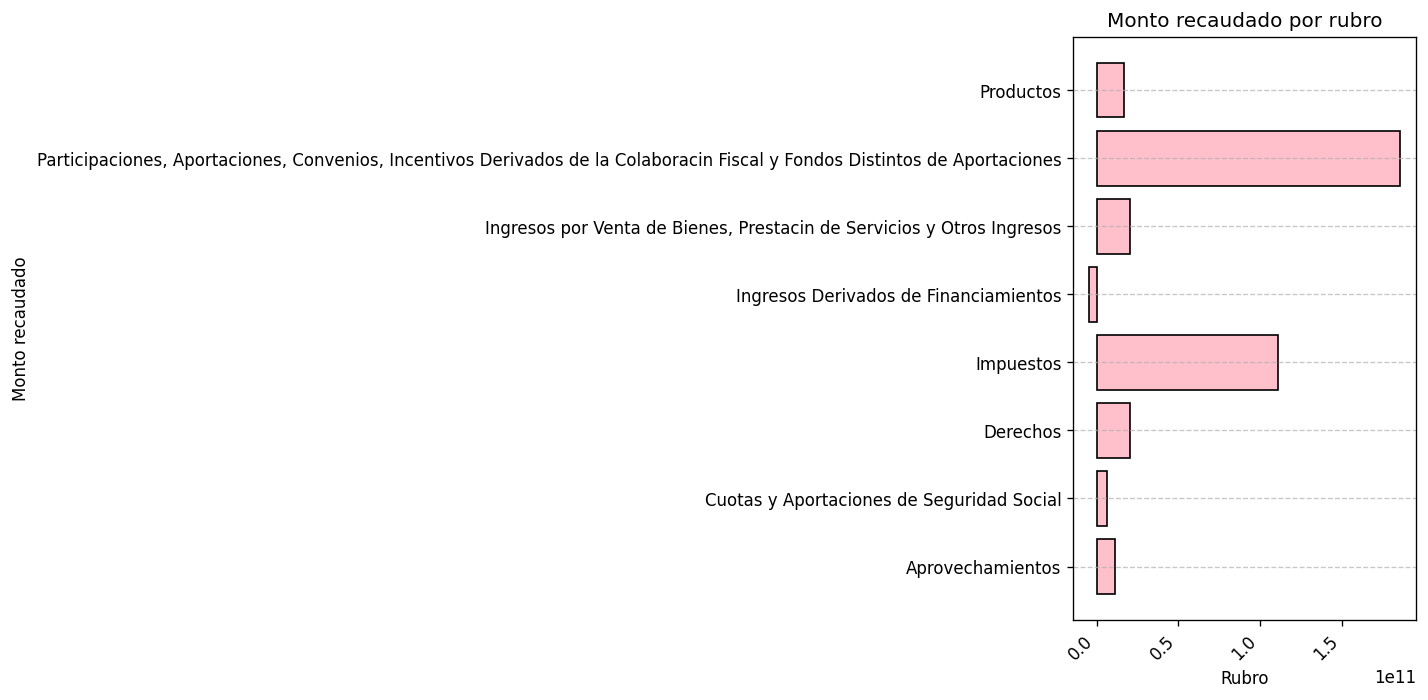

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6), dpi=120)
plt.barh(df_rubro['rubro'], df_rubro['monto_recaudado'], color='pink', edgecolor='black')
#plt.barh(df_rubro['rubro'], df_rubro['monto_recaudado'], color='fuchsia', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Monto recaudado por rubro')
plt.xlabel('Rubro')
plt.ylabel('Monto recaudado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

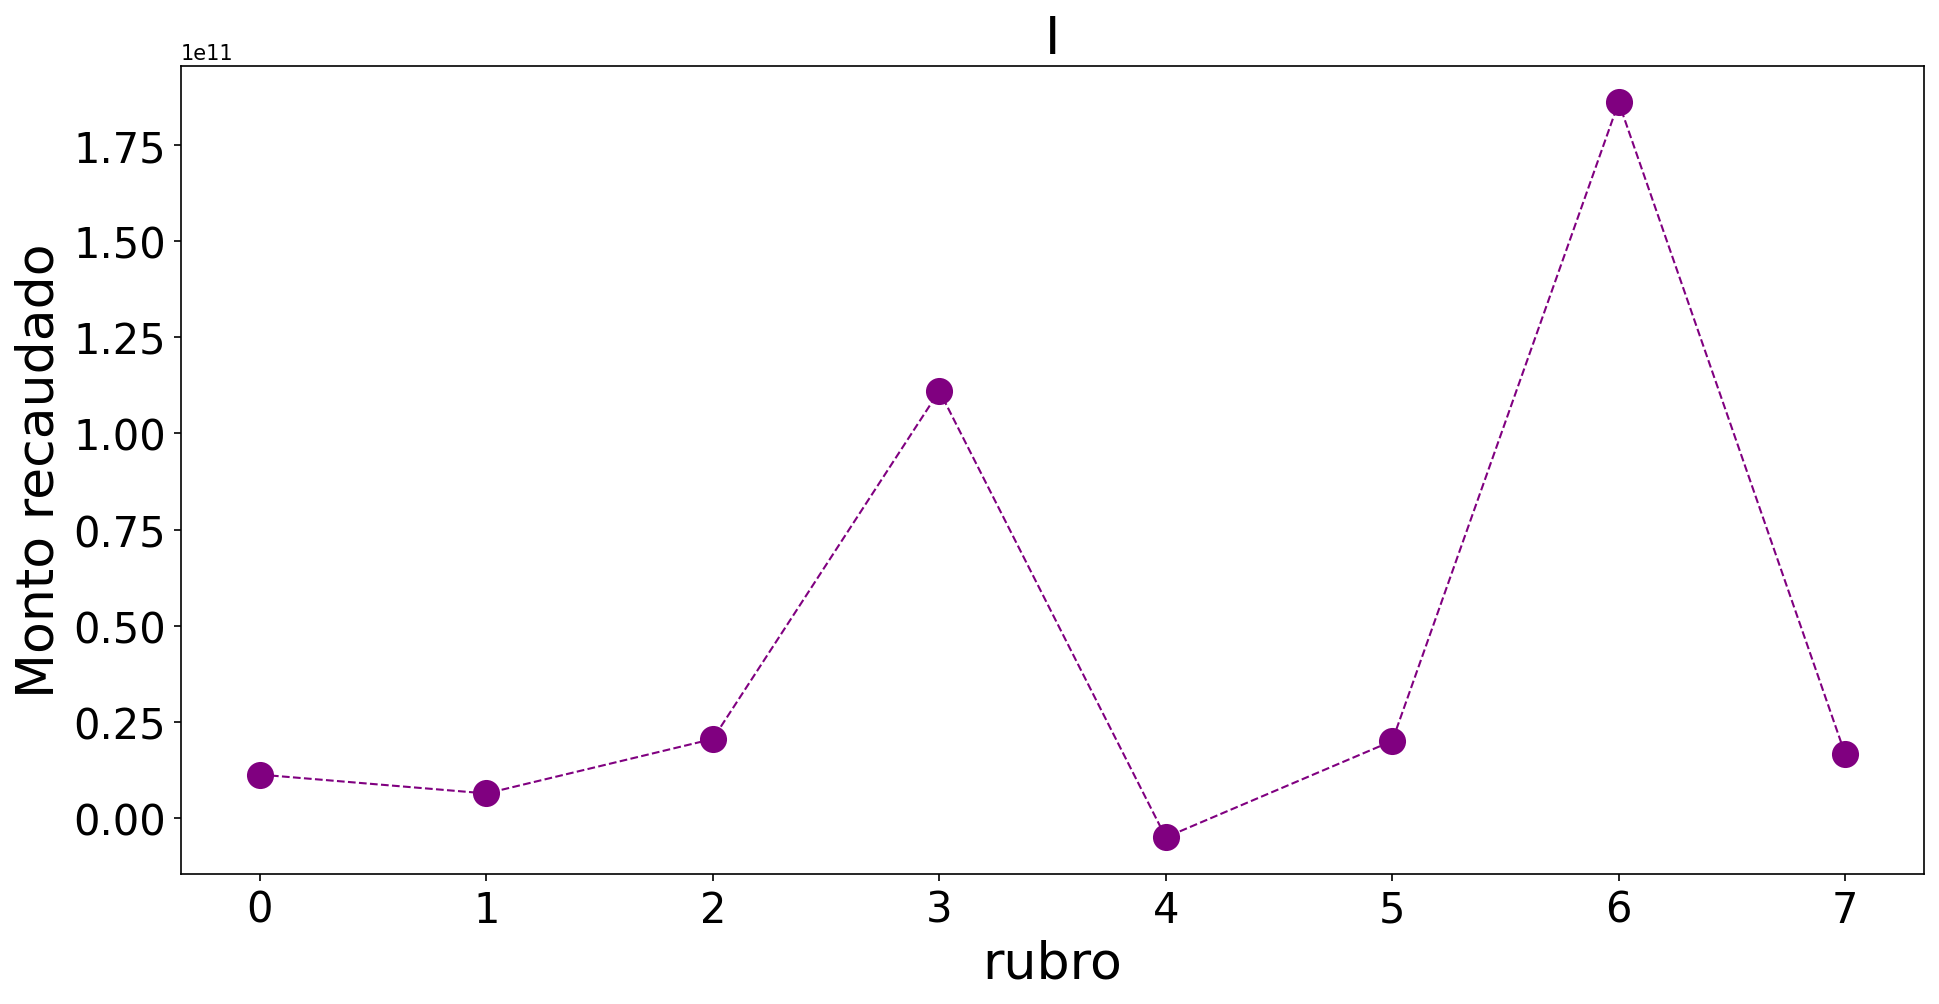

In [118]:
plt.figure(figsize=(15,7), dpi=150)
plt.plot(df_rubro['monto_recaudado'], lw =1, color='purple', linestyle='dashed', marker= 'o', markersize=12)
plt.title('I', fontdict={'fontsize':25})
plt.xlabel('rubro', fontdict={'fontsize':25})
plt.ylabel('Monto recaudado', fontdict={'fontsize':25})
plt.tick_params(labelsize=20)
plt.show()

Obtenga un Dataframe que describa el monto recaudado en cada rubro y el tipo de rubro.

In [119]:
rubro_tipo = ing_21.groupby(['rubro', 'tipo'])['monto_recaudado'].sum().reset_index()

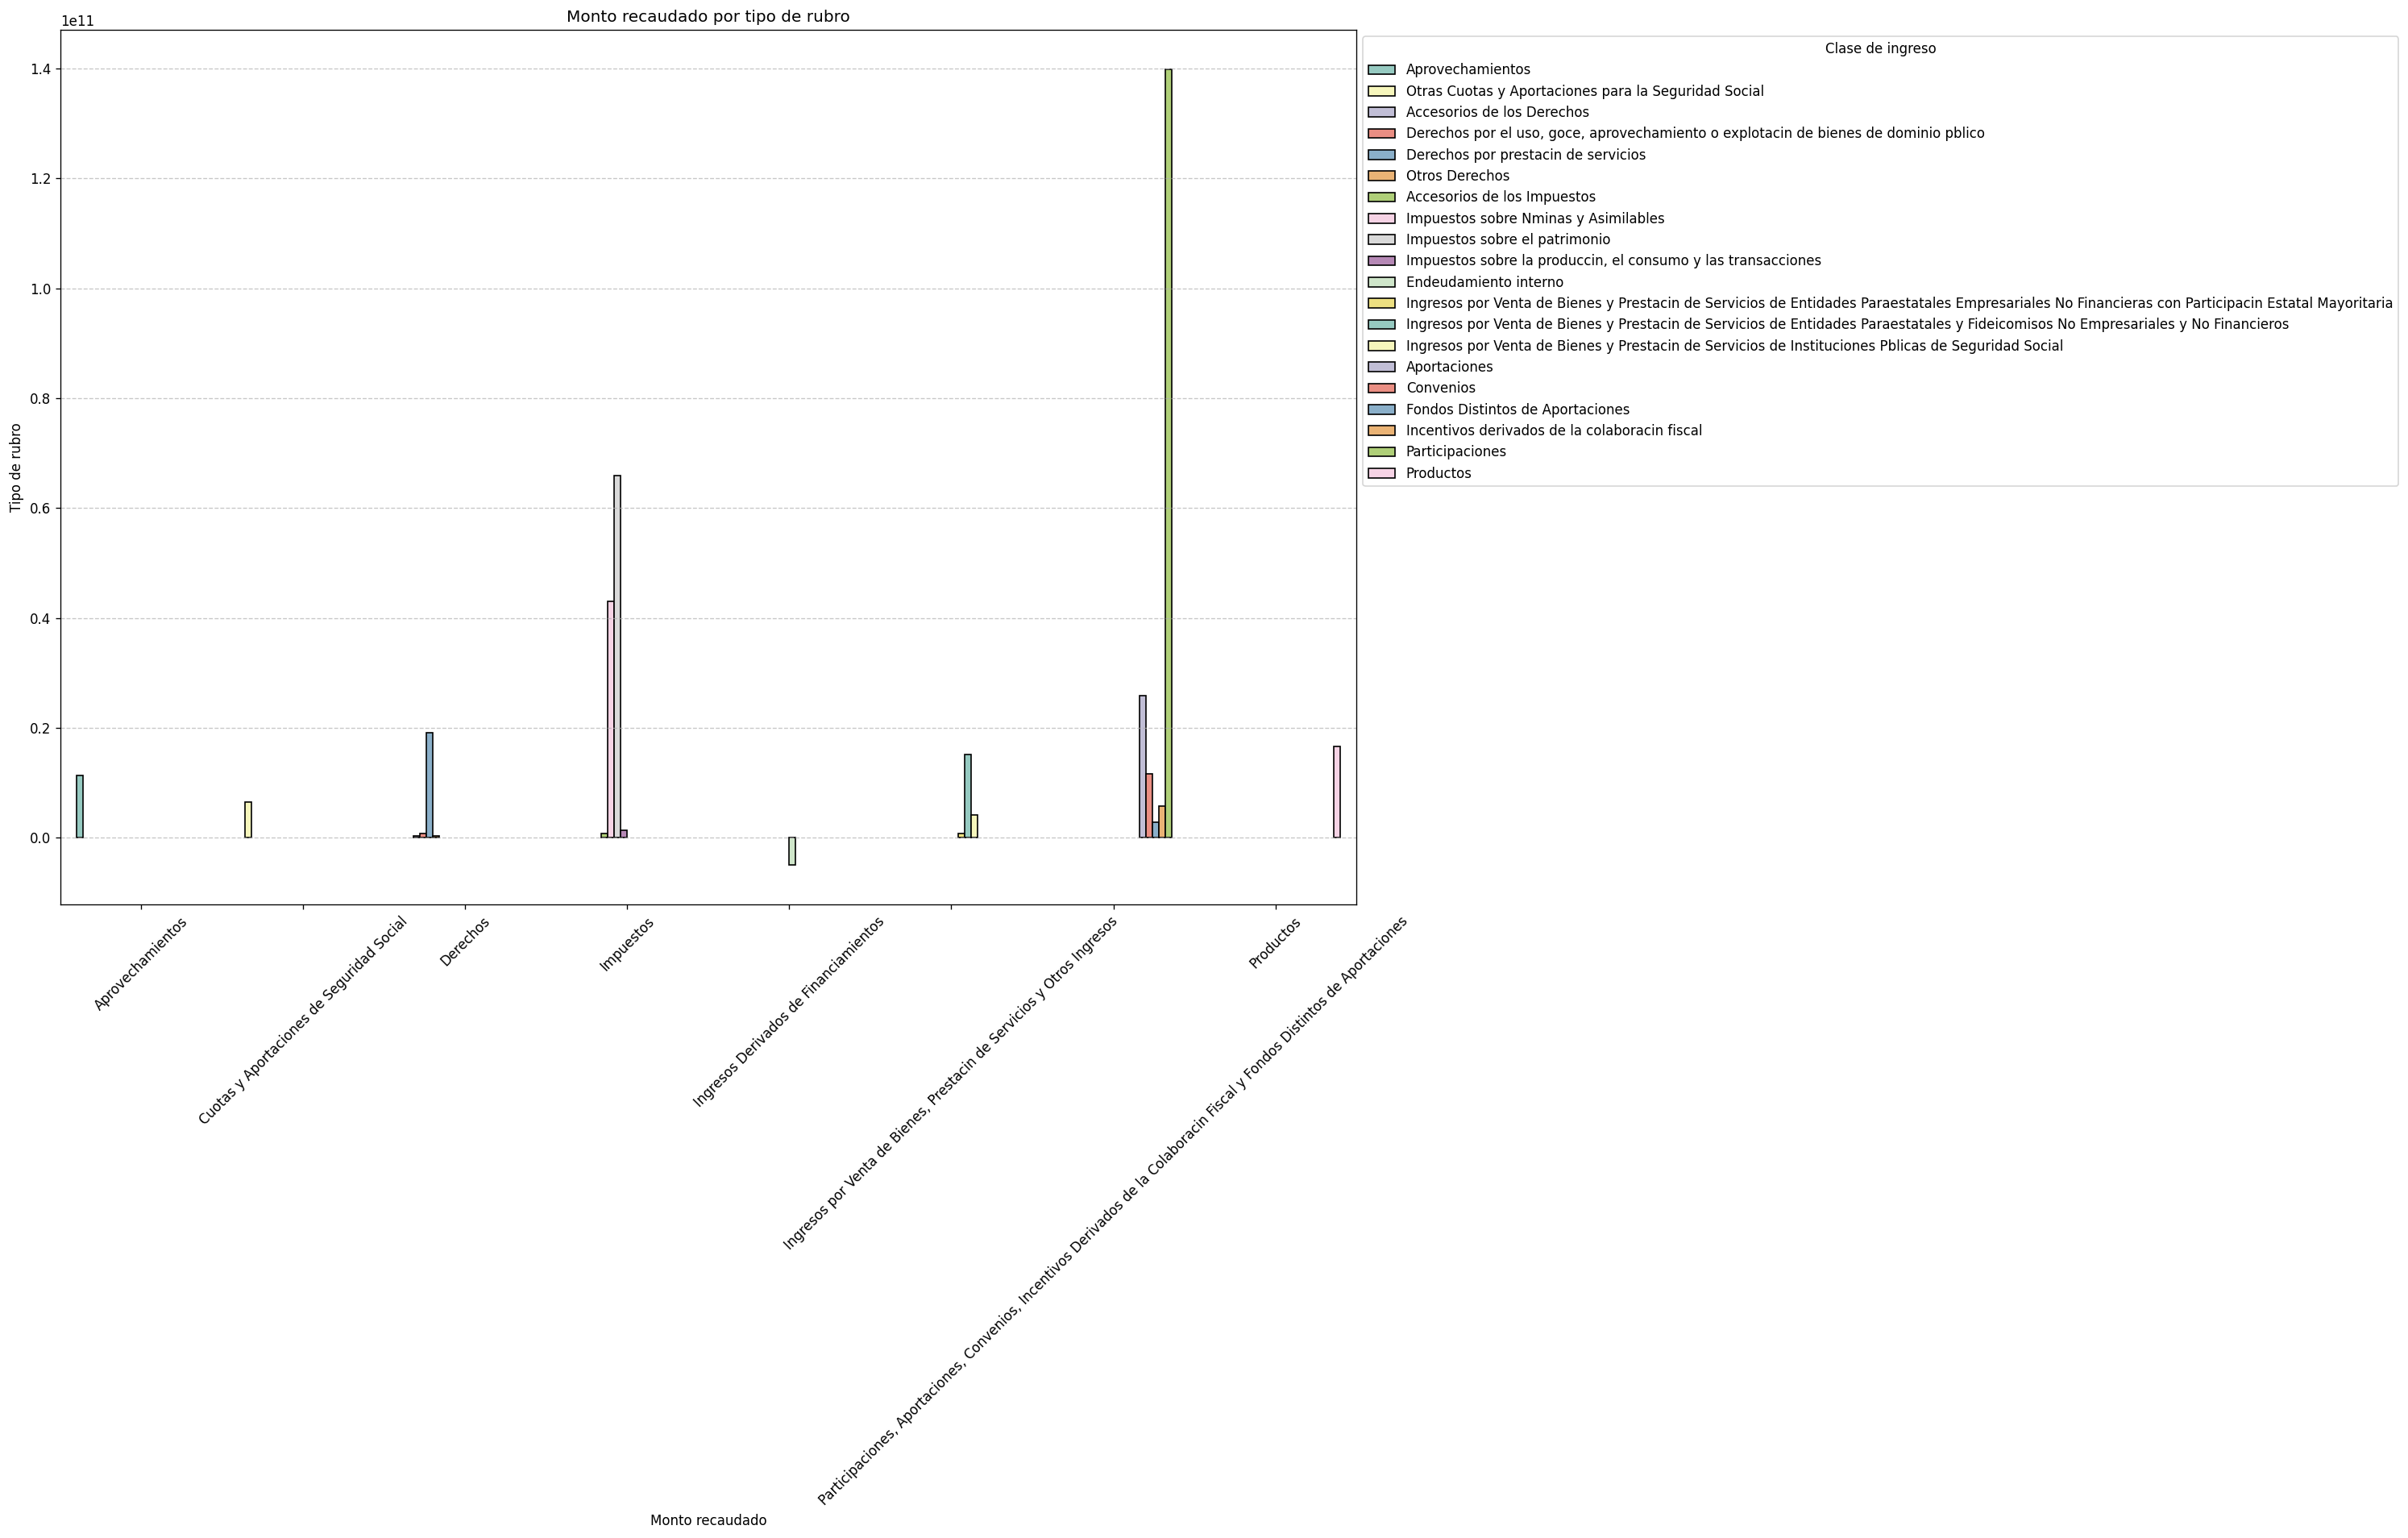

In [120]:
plt.figure(figsize=(25,16), dpi=120)
sns.barplot(data=rubro_tipo, x='rubro', y='monto_recaudado', hue='tipo', palette='Set3', edgecolor='black')
#plt.barh(rubro_tipo['tipo'], rubro_tipo['monto_recaudado'], color='#FF1493', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Monto recaudado por tipo de rubro')
plt.ylabel('Tipo de rubro')
plt.xlabel('Monto recaudado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Clase de ingreso', bbox_to_anchor =(1,1), loc='upper left')
plt.tight_layout()
plt.show()

Obtenga un Dataframe que describa el monto recaudado en cada trimestre. Obtenga una gráfica que ilustre esto.

In [121]:
set(ing_21['periodo'])

{'Primer Trimestre', 'Segundo Trimestre', 'Tercer Trimestre'}

In [122]:
trimestres = {
    'Primer Trimestre': 1,
    'Segundo Trimestre': 2,
    'Tercer Trimestre': 3
}

ing_21['periodo'] = ing_21['periodo'].replace(trimestres)

df.head()

/tmp/ipython-input-122-2461441528.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ing_21['periodo'] = ing_21['periodo'].replace(trimestres)


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q764690


In [123]:
periodos = pd.PeriodIndex(year = ing_21.pop('ciclo'),
                         quarter = ing_21.pop('periodo'),
                         name = 'fecha')

/tmp/ipython-input-123-2483866066.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  periodos = pd.PeriodIndex(year = ing_21.pop('ciclo'),


In [124]:
periodos

PeriodIndex(['2021Q1', '2021Q1', '2021Q1', '2021Q1', '2021Q1', '2021Q1',
             '2021Q1', '2021Q1', '2021Q1', '2021Q1',
             ...
             '2021Q3', '2021Q3', '2021Q3', '2021Q3', '2021Q3', '2021Q3',
             '2021Q3', '2021Q3', '2021Q3', '2021Q3'],
            dtype='period[Q-DEC]', name='fecha', length=240)

In [127]:
ing_21.index = periodos.to_timestamp('D')

In [128]:
ing_21

,rubro,tipo,monto_recaudado
fecha,,,
2021-01-01,Impuestos,Impuestos sobre el patrimonio,12477814565
2021-01-01,Impuestos,Impuestos sobre el patrimonio,1794347452
2021-01-01,Impuestos,Impuestos sobre el patrimonio,3427249462
2021-01-01,Impuestos,"Impuestos sobre la produccin, el consumo y las...",65001439
2021-01-01,Impuestos,"Impuestos sobre la produccin, el consumo y las...",68198080
...,...,...,...
2021-07-01,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboracin fiscal,7920320
2021-07-01,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboracin fiscal,481037778
2021-07-01,"Participaciones, Aportaciones, Convenios, Ince...",Incentivos derivados de la colaboracin fiscal,94048453


In [129]:
ing_21.isna().sum()

,0
rubro,0
tipo,0
monto_recaudado,0


/tmp/ipython-input-130-3276696612.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  gastos = ing_21.resample('Q').sum()


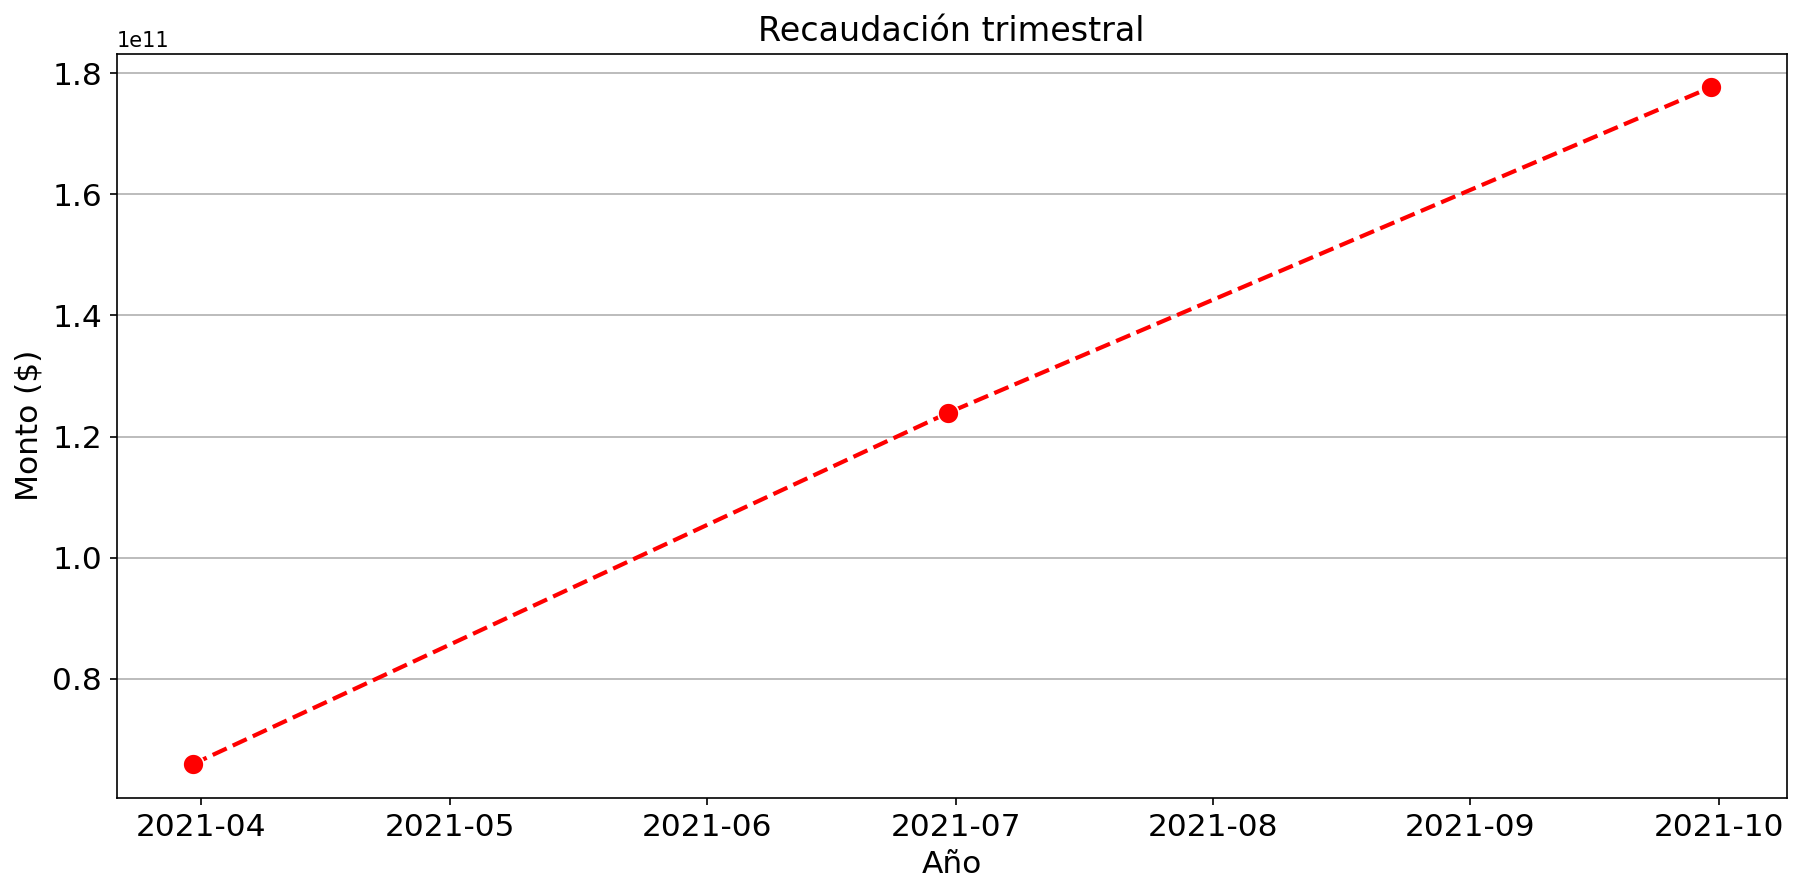

In [130]:
gastos = ing_21.resample('Q').sum()

plt.figure(figsize=(12, 6),dpi=150)
sns.lineplot(data=gastos, x=gastos.index, y='monto_recaudado',
             color = 'red',
             marker='o', linewidth=2,  markersize=10, ls = '--')

plt.title('Recaudación trimestral', fontdict = {'fontsize':16 })
plt.xlabel('Año', fontdict = {'fontsize':15 })
plt.ylabel('Monto ($)', fontdict = {'fontsize':15 })
plt.grid(axis='y')
plt.tight_layout()
plt.tick_params(labelsize=15)
plt.show()

Obtenga un Dataframe que describa el monto recaudado en cada rubro en los tres trimestres. Obtenga una gráfica que ilustre esto.

In [131]:
rubro_trimestre = ing_21.groupby(['rubro', 'fecha'])['monto_recaudado'].sum().reset_index()

/tmp/ipython-input-132-1136362552.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


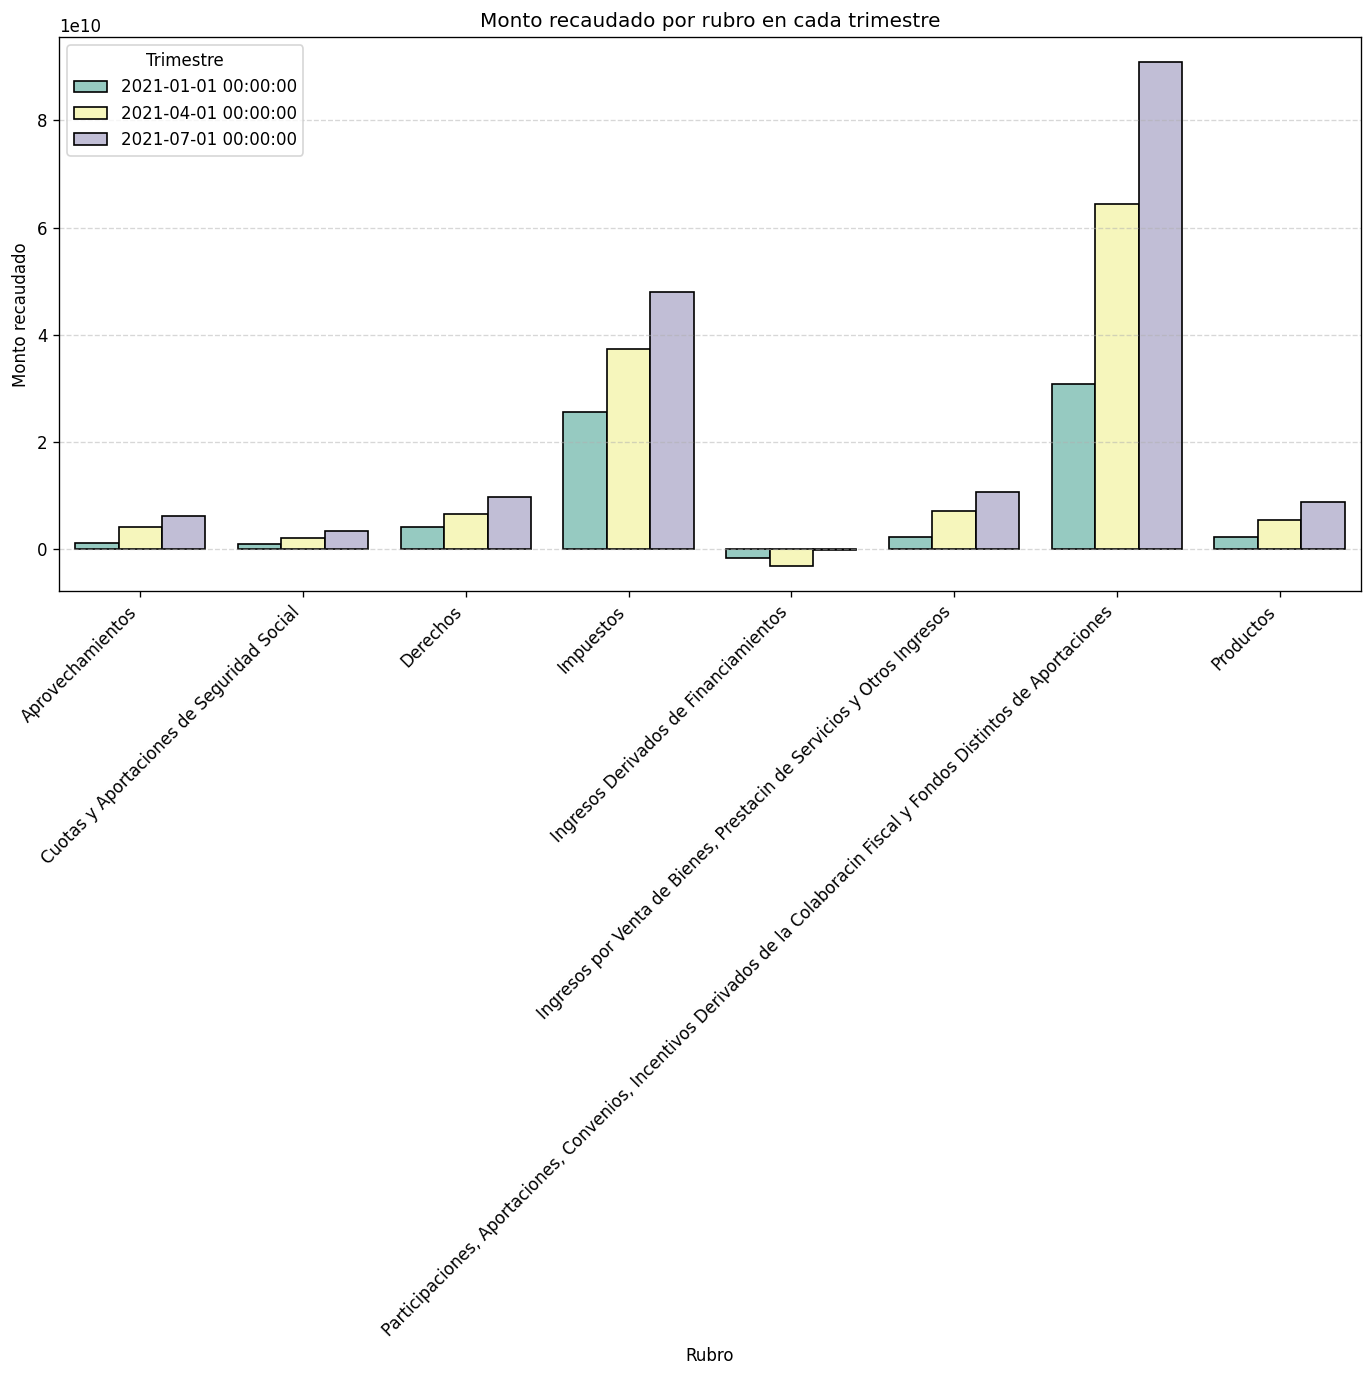

In [132]:
plt.figure(figsize=(14, 6), dpi=120)
sns.barplot(data=rubro_trimestre, x='rubro', y='monto_recaudado',hue='fecha', palette='Set3', edgecolor='black')
plt.title('Monto recaudado por rubro en cada trimestre')
plt.xlabel('Rubro')
plt.ylabel('Monto recaudado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Trimestre')
plt.show()




Coloque en orden alfabético el Dataframe anterior de acuerdo al rubro (1er índice).

In [133]:
rubro_trimestre = rubro_trimestre.sort_values(by='rubro')

In [134]:
rubro_trimestre

,rubro,fecha,monto_recaudado
0,Aprovechamientos,2021-01-01,1105177937
1,Aprovechamientos,2021-04-01,4123707282
2,Aprovechamientos,2021-07-01,6149027333
3,Cuotas y Aportaciones de Seguridad Social,2021-01-01,1018018654
4,Cuotas y Aportaciones de Seguridad Social,2021-04-01,2103876070
5,Cuotas y Aportaciones de Seguridad Social,2021-07-01,3363787950
6,Derechos,2021-01-01,4174313104
7,Derechos,2021-04-01,6640586436
8,Derechos,2021-07-01,9826143584
10,Impuestos,2021-04-01,37313507561


¿Cuál fue el monto total recaudado por la CDMX en 202

In [135]:
monto_recaudado_total = ing_21['monto_recaudado'].sum()

In [137]:
monto_recaudado_total

np.int64(367444318826)

¿De cuánto fue el endeudamiento interno?

In [139]:
df_endeudamiento = ing_21[ing_21['tipo'].str.contains('Endeudamiento interno', case=False, na=False)]

In [140]:
df_endeudamiento

,rubro,tipo,monto_recaudado
fecha,,,
2021-01-01,Ingresos Derivados de Financiamientos,Endeudamiento interno,-1563218883
2021-04-01,Ingresos Derivados de Financiamientos,Endeudamiento interno,-3134022627
2021-07-01,Ingresos Derivados de Financiamientos,Endeudamiento interno,-216372490


In [141]:
df_endeudamiento['monto_recaudado'].sum()

np.int64(-4913614000)

**4. Una empresa realiza entrevistas a 20 candidatos para un puesto. De esos 20 candidatos, 14 son mujeres y 6 son hombres.**

Al final del proceso, se seleccionan 8 personas, de las cuales 7 son mujeres.

Un analista externo se pregunta si el proceso de selección favoreció a las mujeres. Instrucciones:



Plantea una prueba de hipótesis para evaluar si hubo favoritismo hacia las mujeres.

Define la hipótesis nula: la selección fue aleatoria (sin favoritismo).

Define la hipótesis alternativa: hay favoritismo hacia las mujeres.



 Definir hipótesis

*Hipótesis nula (H₀): La selección fue aleatoria. No hay favoritismo hacia las mujeres.

*Hipótesis alternativa (H₁): Hubo favoritismo hacia las mujeres.

Simula mediante Monte Carlo el proceso de seleccionar 8 personas al azar de los 20 candidatos, repitiendo esto al menos 100,000 veces.

In [ ]:
import random
import port numpy as np

# Parámetros
total_candidatos = 20
mujeres = 14
hombres = 6
seleccionados = 8
simulaciones = 100_000

# Crear población: 1 representa mujer, 0 representa hombre
poblacion = [1]*mujeres + [0]*hombres

# Simulación Monte Carlo
resultados = []
for _ in range(simulaciones):
    muestra = random.sample(poblacion, seleccionados)
    num_mujeres = sum(muestra)
    resultados.append(num_mujeres)

# Convertimos a arreglo de numpy para facilitar conteo
resultados = np.array(resultados)



In [ ]:
resultados

array([5, 5, 5, ..., 6, 7, 6])

Calcula el p-valor como la proporción de simulaciones en las que 7 o más mujeres fueron seleccionadas.

In [ ]:
# p-valor: proporción de simulaciones con 7 o más mujeres
p_valor = np.mean(resultados >= 7)

print(f"P-valor estimado: {p_valor:.5f}")



P-valor estimado: 0.18906


Concluye si hay evidencia suficiente para pensar que el proceso favoreció a las mujeres. Usa un nivel de significancia de 5 %.

In [ ]:

if p_valor < 0.05:
    print("Conclusión: Hay evidencia suficiente para sugerir que el proceso favoreció a las mujeres (se rechaza H₀).")
else:
    print("Conclusión: No hay evidencia suficiente para sugerir favoritismo hacia las mujeres (no se rechaza H₀).")


Conclusión: No hay evidencia suficiente para sugerir favoritismo hacia las mujeres (no se rechaza H₀).


**5. Cargue en un objeto 'defunciones' las columnas 'edad', 'sexo','estado' y 'alcaldia' de los datos de las actas de defunción de la Ciudad de México (defunciones_CDMX.csv en GitHub) y realice lo siguiente:**

Agrupe en edades de 10 años: (0, 10], (10, 20], ... y calcule la frecuencia de defunciones en estos grupos (usar pandas.cut).

In [20]:
ruta="https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/defunciones_CDMX.csv"
defunciones=pd.read_csv(ruta, usecols=['edad','sexo','estado','alcaldia'])
defunciones

,edad,sexo,estado,alcaldia
0,73.0,Hombre,CIUDAD DE MEXICO,VENUSTIANO CARRANZA
1,88.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA
2,55.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA
3,81.0,Mujer,CIUDAD DE MEXICO,BENITO JUAREZ
4,87.0,Hombre,CIUDAD DE MEXICO,IZTACALCO
...,...,...,...,...
29995,108.0,Mujer,CIUDAD DE MEXICO,NaN
29996,55.0,Hombre,ESTADO DE MEXICO,NaN
29997,75.0,Mujer,CIUDAD DE MEXICO,IZTACALCO
29998,62.0,Mujer,CIUDAD DE MEXICO,COYOACAN


In [26]:
defunciones.describe()

,edad
count,29985.000000
mean,65.638186
std,21.697029
min,0.000000
25%,55.000000
50%,69.000000
75%,82.000000
max,110.000000


Añada a defunciones una columna con el grupo etario de cada persona:

Niñez (de 0 a 11 años)

Adolescencia (de 12 a 18 años)

Juventud (de 19 a 30 años)

Adultez (de 31 a 59 años)

Vejez (de 60 años en adelante)

In [28]:
edades=defunciones['edad']
edades

,edad
0,73.0
1,88.0
2,55.0
3,81.0
4,87.0
...,...
29995,108.0
29996,55.0
29997,75.0
29998,62.0


In [21]:
defunciones['edad'] = pd.to_numeric(defunciones['edad'], errors='coerce')

In [29]:
bins = [0,11,18,30,59,110]
bins

[0, 11, 18, 30, 59, 110]

In [30]:
#Agrupe en edades de 10 años: (0, 10], (10, 20], ... y calcule la frecuencia de defunciones en estos grupos (usar pandas.cut).
categorias = pd.cut(edades,bins)

categorias

,edad
0,"(59, 110]"
1,"(59, 110]"
2,"(30, 59]"
3,"(59, 110]"
4,"(59, 110]"
...,...
29995,"(59, 110]"
29996,"(30, 59]"
29997,"(59, 110]"
29998,"(59, 110]"


In [31]:
pd.value_counts(categorias)

/tmp/ipython-input-31-192668205.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(categorias)


,count
edad,
"(59, 110]",20494
"(30, 59]",7175
"(18, 30]",1039
"(0, 11]",285
"(11, 18]",260


**Obtenga un Dataframe que contenga la cantidad de defunciones por grupo etario e ilustre con una gráfica.**

In [34]:
grupos = {'<11':'niñez','12 a 18 años':'adolescencia',
                  '19 a 30 años':'juventud',
                  '31 a 59 años':'adultez',
                  '≥ 60 años':'edad_mayor'}

In [35]:
pd.cut(edades,bins,labels=grupos)

,edad
0,≥ 60 años
1,≥ 60 años
2,31 a 59 años
3,≥ 60 años
4,≥ 60 años
...,...
29995,≥ 60 años
29996,31 a 59 años
29997,≥ 60 años
29998,≥ 60 años


In [36]:
defunciones['grupo_edad']= pd.cut(edades,bins,labels=grupos)

In [38]:
defunciones

,edad,sexo,estado,alcaldia,grupo_edad
0,73.0,Hombre,CIUDAD DE MEXICO,VENUSTIANO CARRANZA,≥ 60 años
1,88.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA,≥ 60 años
2,55.0,Hombre,CIUDAD DE MEXICO,IZTAPALAPA,31 a 59 años
3,81.0,Mujer,CIUDAD DE MEXICO,BENITO JUAREZ,≥ 60 años
4,87.0,Hombre,CIUDAD DE MEXICO,IZTACALCO,≥ 60 años
...,...,...,...,...,...
29995,108.0,Mujer,CIUDAD DE MEXICO,NaN,≥ 60 años
29996,55.0,Hombre,ESTADO DE MEXICO,NaN,31 a 59 años
29997,75.0,Mujer,CIUDAD DE MEXICO,IZTACALCO,≥ 60 años
29998,62.0,Mujer,CIUDAD DE MEXICO,COYOACAN,≥ 60 años


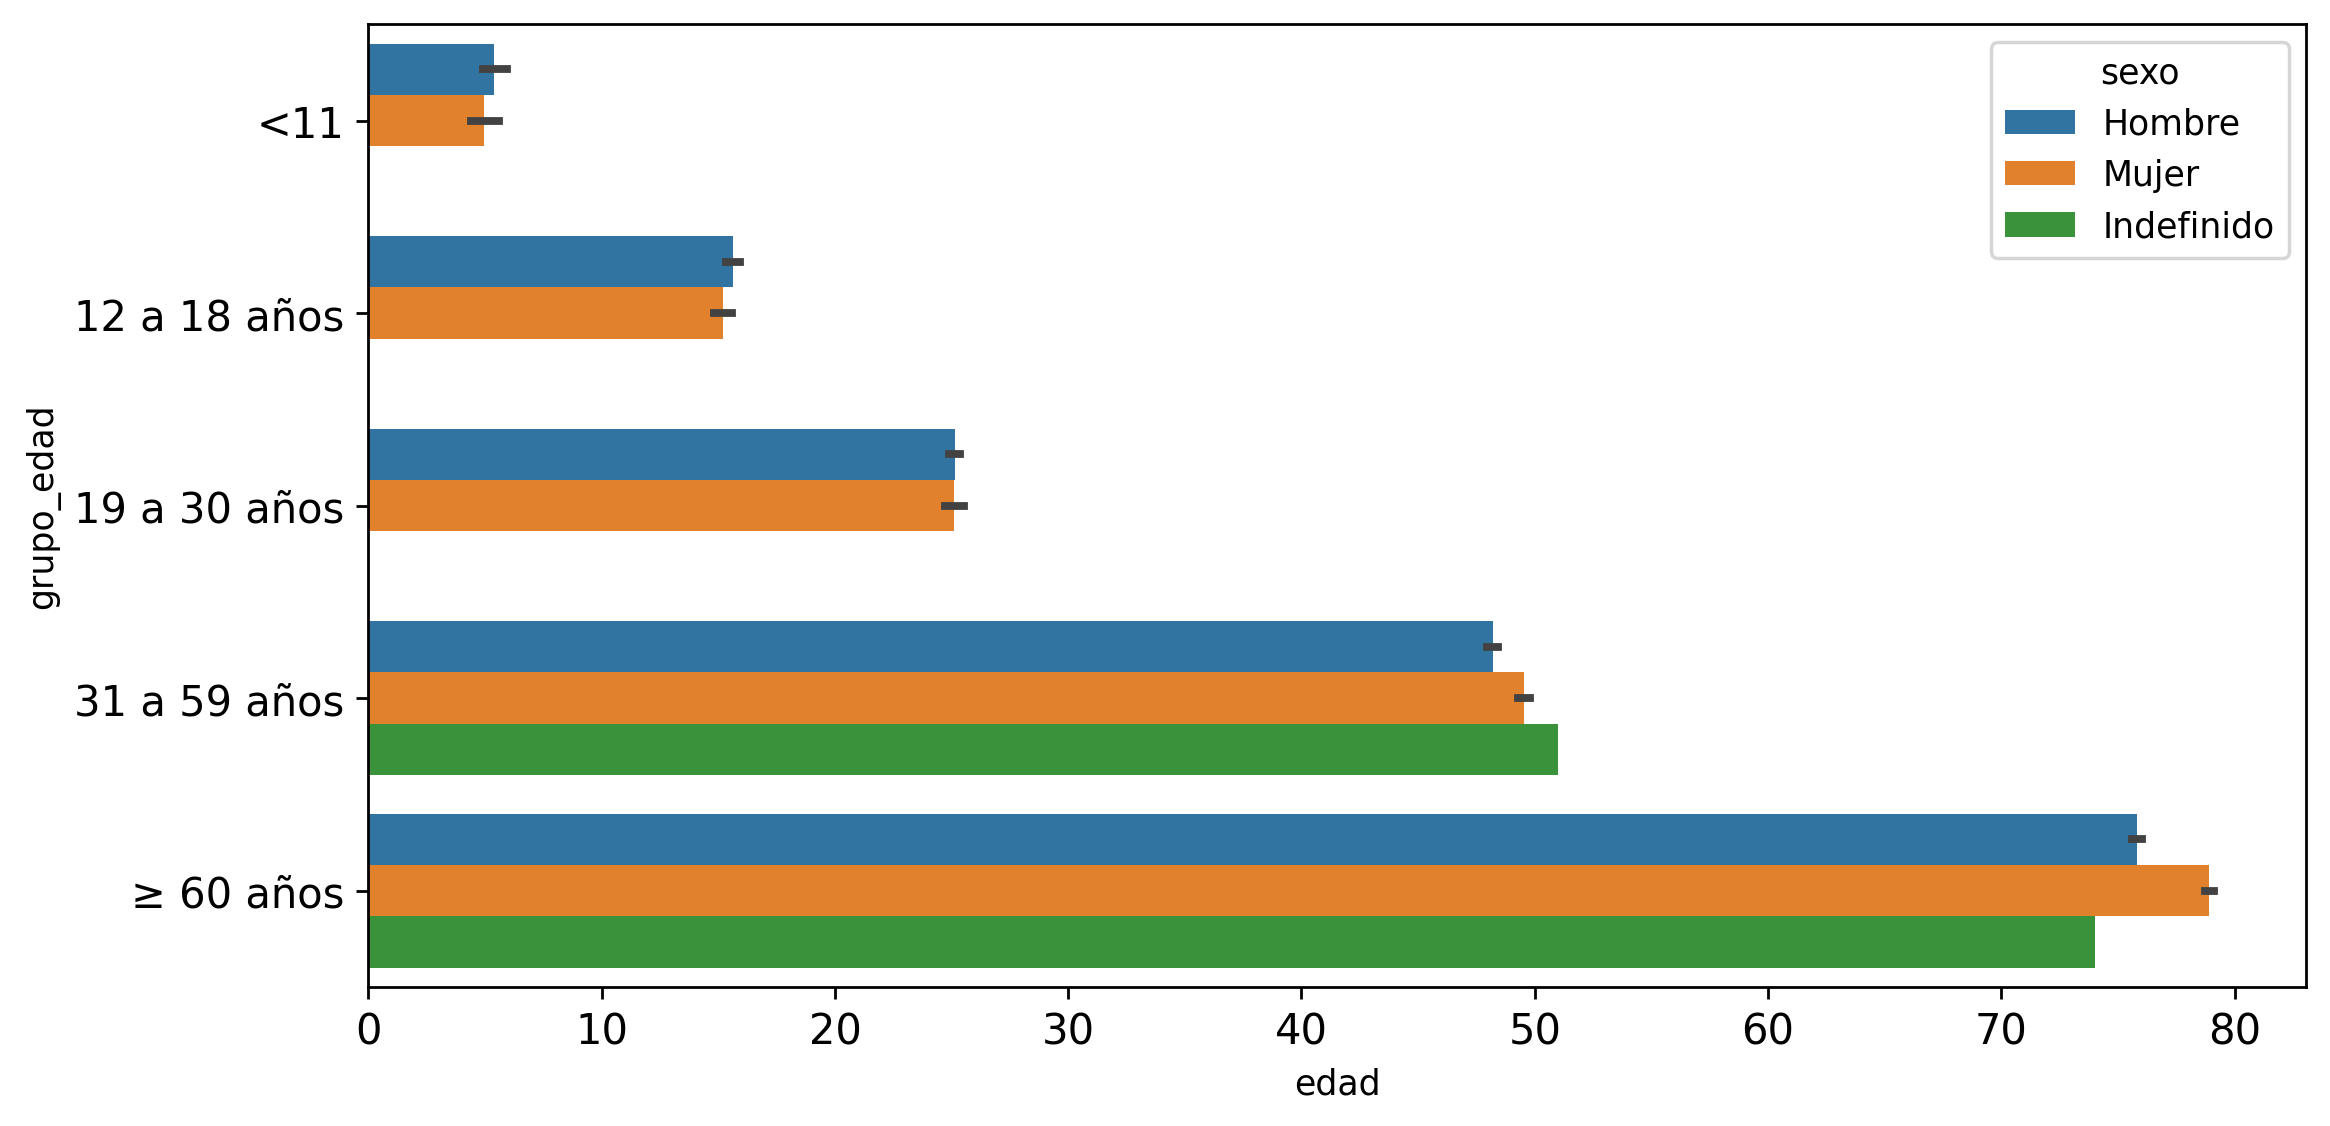

In [41]:
plt.figure(figsize=(10,5), dpi=250)
sns.barplot(data=defunciones, x='edad', y='grupo_edad', hue='sexo')
plt.tick_params(labelsize=12)
plt.show()